### German Apartment Rental Data
@Data: https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany


In [2]:
#panda for geographical data
!pip install geopandas

In [8]:
# Libraries
import numpy as np # for calculations
import pandas as pd # for data manipulations (filtering, tables etc.)
# import requests didnt use

#visual libs
import geopandas as gpd # for germany map
import seaborn as sns # visualisations
import matplotlib.pyplot as plt # visualisations

# from sklearn import preprocessing
# from datetime import date
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler,Normalizer -> check which one to use
from sklearn.model_selection import GridSearchCV, train_test_split # gridsearch for hyperparameter tuning -> didnt use traintest for splitting the data between training and test data

from sklearn.decomposition import PCA # principal component analysis for making feature engineering

In [9]:
df=pd.read_csv(r"C:\Users\bkari\Desktop\data_rentals\archive\immo_data.csv") # read data

In [10]:
germany_map = gpd.read_file(r'C:\Users\bkari\Desktop\data_rentals\plz-5stellig.shp') # read data set for germany map

In [11]:
germany_map['plz'] = germany_map['plz'].astype(int) #change PLZ to integer

In [12]:
# exploratory data analysis (EDA) and Cleaning

In [13]:
df.info() # coloumns which are not zero, data types, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [14]:
df.describe() # descriptive statistics of numerical features -> all coloumns which have float or integer values 18+6=24

serviceCharge  telekomHybridUploadSpeed   picturecount     pricetrend  \
count  261941.000000                   45020.0  268850.000000  267018.000000   
mean      151.206113                      10.0       9.791958       3.389001   
std       308.295790                       0.0       6.408399       1.964874   
min         0.000000                      10.0       0.000000     -12.330000   
25%        95.000000                      10.0       6.000000       2.000000   
50%       135.000000                      10.0       9.000000       3.390000   
75%       190.000000                      10.0      13.000000       4.570000   
max    146118.000000                      10.0     121.000000      14.920000   

       telekomUploadSpeed     totalRent  yearConstructed       scoutId  \
count       235492.000000  2.283330e+05    211805.000000  2.688500e+05   
mean            28.804928  9.013315e+02      1966.400590  1.069697e+08   
std             16.337151  3.323833e+04        46.992207  1.250093e+07   
min              1.000000  0.000000e+00      1000.000000  2.887174e+07   
25%             10.000000  4.698000e+02      1950.000000  1.066910e+08   
50%             40.000000  6.500000e+02      1973.000000  1.111584e+08   
75%             40.000000  9.850000e+02      1996.000000  1.137688e+08   
max            100.000000  1.575154e+07      2090.000000  1.157117e+08   

       noParkSpaces  yearConstructedRange  ...        noRooms    thermalChar  \
count  93052.000000         211805.000000  ...  268850.000000  162344.000000   
mean       1.327634              3.714544  ...       2.641261     114.749533   
std        8.361403              2.738134  ...       2.633440      61.653663   
min        0.000000              1.000000  ...       1.000000       0.100000   
25%        1.000000              1.000000  ...       2.000000      79.000000   
50%        1.000000              3.000000  ...       3.000000     107.000000   
75%        1.000000              5.000000  ...       3.000000     140.300000   
max     2241.000000              9.000000  ...     999.990000    1996.000000   

               floor  numberOfFloors   noRoomsRange  livingSpaceRange  \
count  217541.000000   171118.000000  268850.000000     268850.000000   
mean        2.122405        3.572319       2.571542          3.070790   
std         3.634934        6.375496       0.937594          1.407127   
min        -1.000000        0.000000       1.000000          1.000000   
25%         1.000000        2.000000       2.000000          2.000000   
50%         2.000000        3.000000       3.000000          3.000000   
75%         3.000000        4.000000       3.000000          4.000000   
max       999.000000      999.000000       5.000000          7.000000   

       heatingCosts  lastRefurbish  electricityBasePrice  electricityKwhPrice  
count  85518.000000   80711.000000          46846.000000         46846.000000  
mean      76.990866    2013.904536             89.113612             0.199769  
std      147.716278      10.963125              5.395805             0.009667  
min        0.000000    1015.000000             71.430000             0.170500  
25%       54.000000    2012.000000             90.760000             0.191500  
50%       70.000000    2017.000000             90.760000             0.198500  
75%       90.000000    2019.000000             90.760000             0.205500  
max    12613.000000    2919.000000             90.760000             0.227600  

[8 rows x 24 columns]

In [15]:
counts_of_nan=df.isna().sum().sort_values(ascending=False) # absolute number of empty cells
counts_of_nan

telekomHybridUploadSpeed    223830
electricityBasePrice        222004
electricityKwhPrice         222004
energyEfficiencyClass       191063
lastRefurbish               188139
heatingCosts                183332
noParkSpaces                175798
petsAllowed                 114573
interiorQual                112665
thermalChar                 106506
numberOfFloors               97732
houseNumber                  71018
streetPlain                  71013
condition                    68489
yearConstructedRange         57045
yearConstructed              57045
firingTypes                  56964
facilities                   52924
floor                        51309
heatingType                  44856
totalRent                    40517
typeOfFlat                   36614
telekomUploadSpeed           33358
telekomTvOffer               32619
description                  19747
serviceCharge                 6909
pricetrend                    1832
picturecount                     0
hasKitchen          

In [16]:
percentage_of_nans=(df.isna().sum().sort_values(ascending=False)/df.shape[0]).sort_values(ascending=False) # same as above just in percentage
percentage_of_nans

telekomHybridUploadSpeed    0.832546
electricityBasePrice        0.825754
electricityKwhPrice         0.825754
energyEfficiencyClass       0.710668
lastRefurbish               0.699792
heatingCosts                0.681912
noParkSpaces                0.653889
petsAllowed                 0.426160
interiorQual                0.419063
thermalChar                 0.396154
numberOfFloors              0.363519
houseNumber                 0.264155
streetPlain                 0.264136
condition                   0.254748
yearConstructedRange        0.212182
yearConstructed             0.212182
firingTypes                 0.211880
facilities                  0.196853
floor                       0.190846
heatingType                 0.166844
totalRent                   0.150705
typeOfFlat                  0.136187
telekomUploadSpeed          0.124077
telekomTvOffer              0.121328
description                 0.073450
serviceCharge               0.025698
pricetrend                  0.006814
r

In [17]:
vals=pd.concat([percentage_of_nans,counts_of_nan], axis=1, keys=['percent','counts']) # joining the previous two tables
vals

percent  counts
telekomHybridUploadSpeed  0.832546  223830
electricityBasePrice      0.825754  222004
electricityKwhPrice       0.825754  222004
energyEfficiencyClass     0.710668  191063
lastRefurbish             0.699792  188139
heatingCosts              0.681912  183332
noParkSpaces              0.653889  175798
petsAllowed               0.426160  114573
interiorQual              0.419063  112665
thermalChar               0.396154  106506
numberOfFloors            0.363519   97732
houseNumber               0.264155   71018
streetPlain               0.264136   71013
condition                 0.254748   68489
yearConstructedRange      0.212182   57045
yearConstructed           0.212182   57045
firingTypes               0.211880   56964
facilities                0.196853   52924
floor                     0.190846   51309
heatingType               0.166844   44856
totalRent                 0.150705   40517
typeOfFlat                0.136187   36614
telekomUploadSpeed        0.124077   33358
telekomTvOffer            0.121328   32619
description               0.073450   19747
serviceCharge             0.025698    6909
pricetrend                0.006814    1832
regio3                    0.000000       0
geo_krs                   0.000000       0
regio2                    0.000000       0
livingSpaceRange          0.000000       0
garden                    0.000000       0
noRoomsRange              0.000000       0
noRooms                   0.000000       0
geo_plz                   0.000000       0
baseRentRange             0.000000       0
lift                      0.000000       0
street                    0.000000       0
livingSpace               0.000000       0
baseRent                  0.000000       0
cellar                    0.000000       0
geo_bln                   0.000000       0
date                      0.000000       0
balcony                   0.000000       0
scoutId                   0.000000       0
newlyConst                0.000000       0
hasKitchen                0.000000       0
picturecount              0.000000       0
regio1                    0.000000       0

In [18]:
df = df.drop((vals[vals['percent'] > 0.25]).index,1) # drop every feature where more than 25% is empty

In [19]:
df

regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268847               Hessen         220.00                 central_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   
268849               Hessen         315.00                 central_heating   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
0       ONE_YEAR_FREE       False    False             6        4.62   
1       ONE_YEAR_FREE       False     True             8        3.47   
2       ONE_YEAR_FREE        True     True             8        2.72   
3       ONE_YEAR_FREE       False     True             9        1.53   
4                 NaN       False     True            19        2.46   
...               ...         ...      ...           ...         ...   
268845  ONE_YEAR_FREE       False     True             0        2.74   
268846            NaN       False     True            12        6.49   
268847  ONE_YEAR_FREE       False     True            21        2.90   
268848            NaN        True     True            16        4.39   
268849            NaN       False     True             9        5.00   

        telekomUploadSpeed  totalRent  ...  noRooms  floor noRoomsRange  \
0                     10.0      840.0  ...      4.0    1.0            4   
1                     10.0        NaN  ...      3.0    NaN            3   
2                      2.4     1300.0  ...      3.0    3.0            3   
3                     40.0        NaN  ...      3.0    3.0            3   
4                      NaN      903.0  ...      3.0    1.0            3   
...                    ...        ...  ...      ...    ...          ...   
268845                10.0      910.0  ...      3.0    NaN            3   
268846                 NaN     1150.0  ...      3.5    1.0            3   
268847                40.0      930.0  ...      4.0    1.0            4   
268848                 NaN     1015.0  ...      2.0    NaN            2   
268849                 NaN        NaN  ...      3.0    NaN            3   

        garden livingSpaceRange                   regio2  \
0         True                4                 Dortmund   
1        False                4        Rhein_Pfalz_Kreis   
2        False                4                  Dresden   
3        False                2      Mittelsachsen_Kreis   
4        False                4                   Bremen   
...        ...              ...                      ...   
268845   False                4  Weilheim_Schongau_Kreis   
268846   False                5         Bergstraße_Kreis   
268847    True                4   Limburg_Weilburg_Kreis   
268848   False                3                     Köln   
268849   False                3        Frankfurt_am_Main   

                            regio3  \
0                          Schüren   
1                   Böhl_Iggelheim   
2       Äußere_Neustadt_Antonstadt   
3                         Freiberg   
4                Neu_Schwachhausen   
...                            ...   
268845                    Eberfing   
268846                   Viernheim   
268847         Limburg_an_der_Lahn   
268848                   Dellbrück   
268849                  Sossenheim   

                                              description  \
0       Die ebenerdig zu erreichende Erdgeschosswohnun...   
1       Alles neu 

In [20]:
(df.isna().sum().sort_values(ascending=False)/df.shape[0]).sort_values(ascending=False) # checking which coloumns are left

yearConstructed         0.212182
yearConstructedRange    0.212182
firingTypes             0.211880
facilities              0.196853
floor                   0.190846
heatingType             0.166844
totalRent               0.150705
typeOfFlat              0.136187
telekomUploadSpeed      0.124077
telekomTvOffer          0.121328
description             0.073450
serviceCharge           0.025698
pricetrend              0.006814
picturecount            0.000000
scoutId                 0.000000
date                    0.000000
geo_bln                 0.000000
regio1                  0.000000
regio3                  0.000000
baseRentRange           0.000000
regio2                  0.000000
livingSpaceRange        0.000000
garden                  0.000000
noRoomsRange            0.000000
noRooms                 0.000000
geo_plz                 0.000000
lift                    0.000000
newlyConst              0.000000
street                  0.000000
geo_krs                 0.000000
livingSpac

In [21]:
df[['regio1', 'regio2', 'regio3']].head() # checking the difference between the 3 regions

regio1               regio2                      regio3
0  Nordrhein_Westfalen             Dortmund                     Schüren
1      Rheinland_Pfalz    Rhein_Pfalz_Kreis              Böhl_Iggelheim
2              Sachsen              Dresden  Äußere_Neustadt_Antonstadt
3              Sachsen  Mittelsachsen_Kreis                    Freiberg
4               Bremen               Bremen           Neu_Schwachhausen

In [22]:
# rename columns for regio
df.rename(columns={'regio1': 'state', 'regio2': 'district', 'regio3': 'town'}, inplace=True)

In [23]:
df.dtypes # checking data types so i dont have to scroll

state                    object
serviceCharge           float64
heatingType              object
telekomTvOffer           object
newlyConst                 bool
balcony                    bool
picturecount              int64
pricetrend              float64
telekomUploadSpeed      float64
totalRent               float64
yearConstructed         float64
scoutId                   int64
firingTypes              object
hasKitchen                 bool
geo_bln                  object
cellar                     bool
yearConstructedRange    float64
baseRent                float64
livingSpace             float64
geo_krs                  object
street                   object
lift                       bool
baseRentRange             int64
typeOfFlat               object
geo_plz                   int64
noRooms                 float64
floor                   float64
noRoomsRange              int64
garden                     bool
livingSpaceRange          int64
district                 object
town    

In [24]:
(df.isna().sum().sort_values(ascending=False)/df.shape[0]).sort_values(ascending=False) # repetition

yearConstructed         0.212182
yearConstructedRange    0.212182
firingTypes             0.211880
facilities              0.196853
floor                   0.190846
heatingType             0.166844
totalRent               0.150705
typeOfFlat              0.136187
telekomUploadSpeed      0.124077
telekomTvOffer          0.121328
description             0.073450
serviceCharge           0.025698
pricetrend              0.006814
picturecount            0.000000
scoutId                 0.000000
date                    0.000000
geo_bln                 0.000000
state                   0.000000
town                    0.000000
baseRentRange           0.000000
district                0.000000
livingSpaceRange        0.000000
garden                  0.000000
noRoomsRange            0.000000
noRooms                 0.000000
geo_plz                 0.000000
lift                    0.000000
newlyConst              0.000000
street                  0.000000
geo_krs                 0.000000
livingSpac

In [25]:
df

state  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268847               Hessen         220.00                 central_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   
268849               Hessen         315.00                 central_heating   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
0       ONE_YEAR_FREE       False    False             6        4.62   
1       ONE_YEAR_FREE       False     True             8        3.47   
2       ONE_YEAR_FREE        True     True             8        2.72   
3       ONE_YEAR_FREE       False     True             9        1.53   
4                 NaN       False     True            19        2.46   
...               ...         ...      ...           ...         ...   
268845  ONE_YEAR_FREE       False     True             0        2.74   
268846            NaN       False     True            12        6.49   
268847  ONE_YEAR_FREE       False     True            21        2.90   
268848            NaN        True     True            16        4.39   
268849            NaN       False     True             9        5.00   

        telekomUploadSpeed  totalRent  ...  noRooms  floor noRoomsRange  \
0                     10.0      840.0  ...      4.0    1.0            4   
1                     10.0        NaN  ...      3.0    NaN            3   
2                      2.4     1300.0  ...      3.0    3.0            3   
3                     40.0        NaN  ...      3.0    3.0            3   
4                      NaN      903.0  ...      3.0    1.0            3   
...                    ...        ...  ...      ...    ...          ...   
268845                10.0      910.0  ...      3.0    NaN            3   
268846                 NaN     1150.0  ...      3.5    1.0            3   
268847                40.0      930.0  ...      4.0    1.0            4   
268848                 NaN     1015.0  ...      2.0    NaN            2   
268849                 NaN        NaN  ...      3.0    NaN            3   

        garden livingSpaceRange                 district  \
0         True                4                 Dortmund   
1        False                4        Rhein_Pfalz_Kreis   
2        False                4                  Dresden   
3        False                2      Mittelsachsen_Kreis   
4        False                4                   Bremen   
...        ...              ...                      ...   
268845   False                4  Weilheim_Schongau_Kreis   
268846   False                5         Bergstraße_Kreis   
268847    True                4   Limburg_Weilburg_Kreis   
268848   False                3                     Köln   
268849   False                3        Frankfurt_am_Main   

                              town  \
0                          Schüren   
1                   Böhl_Iggelheim   
2       Äußere_Neustadt_Antonstadt   
3                         Freiberg   
4                Neu_Schwachhausen   
...                            ...   
268845                    Eberfing   
268846                   Viernheim   
268847         Limburg_an_der_Lahn   
268848                   Dellbrück   
268849                  Sossenheim   

                                              description  \
0       Die ebenerdig zu erreichende Erdgeschosswohnun...   
1       Alles neu m

In [26]:
df.describe() # recalculating values after clean up

serviceCharge   picturecount     pricetrend  telekomUploadSpeed  \
count  261941.000000  268850.000000  267018.000000       235492.000000   
mean      151.206113       9.791958       3.389001           28.804928   
std       308.295790       6.408399       1.964874           16.337151   
min         0.000000       0.000000     -12.330000            1.000000   
25%        95.000000       6.000000       2.000000           10.000000   
50%       135.000000       9.000000       3.390000           40.000000   
75%       190.000000      13.000000       4.570000           40.000000   
max    146118.000000     121.000000      14.920000          100.000000   

          totalRent  yearConstructed       scoutId  yearConstructedRange  \
count  2.283330e+05    211805.000000  2.688500e+05         211805.000000   
mean   9.013315e+02      1966.400590  1.069697e+08              3.714544   
std    3.323833e+04        46.992207  1.250093e+07              2.738134   
min    0.000000e+00      1000.000000  2.887174e+07              1.000000   
25%    4.698000e+02      1950.000000  1.066910e+08              1.000000   
50%    6.500000e+02      1973.000000  1.111584e+08              3.000000   
75%    9.850000e+02      1996.000000  1.137688e+08              5.000000   
max    1.575154e+07      2090.000000  1.157117e+08              9.000000   

           baseRent    livingSpace  baseRentRange        geo_plz  \
count  2.688500e+05  268850.000000  268850.000000  268850.000000   
mean   6.941294e+02      74.355548       3.765256   37283.022235   
std    1.953602e+04     254.759208       2.214357   27798.037296   
min    0.000000e+00       0.000000       1.000000     852.000000   
25%    3.380000e+02      54.000000       2.000000    9128.000000   
50%    4.900000e+02      67.320000       3.000000   38667.000000   
75%    7.990000e+02      87.000000       5.000000   57072.000000   
max    9.999999e+06  111111.000000       9.000000   99998.000000   

             noRooms          floor   noRoomsRange  livingSpaceRange  
count  268850.000000  217541.000000  268850.000000     268850.000000  
mean        2.641261       2.122405       2.571542          3.070790  
std         2.633440       3.634934       0.937594          1.407127  
min         1.000000      -1.000000       1.000000          1.000000  
25%         2.000000       1.000000       2.000000          2.000000  
50%         3.000000       2.000000       3.000000          3.000000  
75%         3.000000       3.000000       3.000000          4.000000  
max       999.990000     999.000000       5.000000          7.000000

In [27]:
df.dropna(subset=['totalRent'],inplace=True) # drop rows where totalRent is not filled

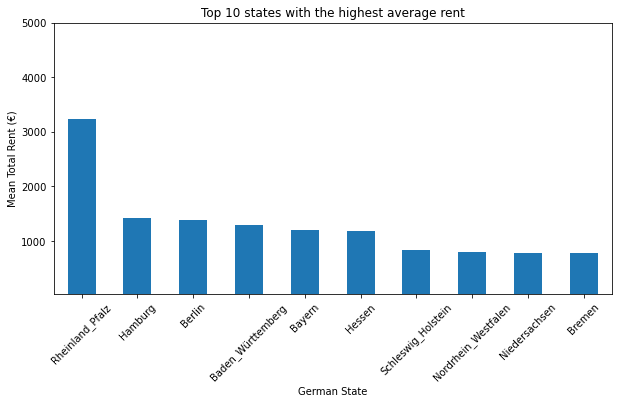

In [28]:
df.groupby('state')['totalRent'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 5)) # graph for highest 10 rents to check if there is an outlier
plt.title('Top 10 states with the highest average rent')
plt.ylabel('Mean Total Rent (€)')
plt.ylim(20, 5000)
# plot xlabel at an angle of 45 degrees so names can be read nicely
plt.xticks(rotation=45)
plt.xlabel('German State')
plt.show()

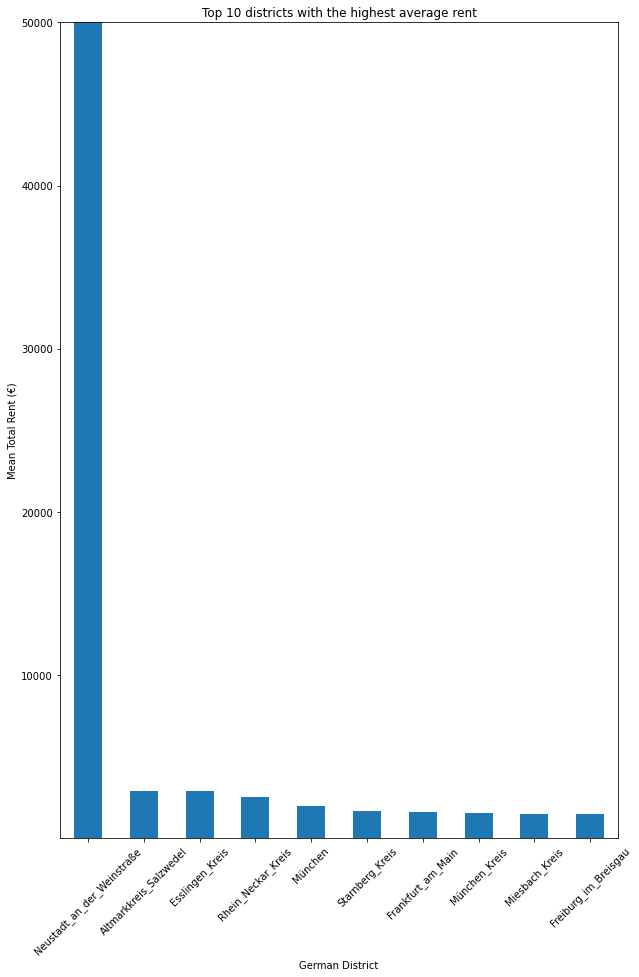

In [30]:
df.groupby('district')['totalRent'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 15))
plt.title('Top 10 districts with the highest average rent')
plt.ylabel('Mean Total Rent (€)')
plt.ylim(20, 50000)
# plot xlabel at an angle of 45 degrees
plt.xticks(rotation=45)
plt.xlabel('German District')
plt.show()

In [ ]:
# Above one can see that at Neustadt_an_der_Weinstraße there are some "funny" results

In [31]:
df[df['district']=='Neustadt_an_der_Weinstraße'] #checking outlier Neustadt -> small non-representative value doesnt fit the data

state  serviceCharge                     heatingType  \
842     Rheinland_Pfalz          200.0                 central_heating   
1541    Rheinland_Pfalz           95.0                 central_heating   
3831    Rheinland_Pfalz          100.0                     gas_heating   
5079    Rheinland_Pfalz          100.0  self_contained_central_heating   
5885    Rheinland_Pfalz          730.0                 central_heating   
...                 ...            ...                             ...   
255503  Rheinland_Pfalz          150.0                 central_heating   
261035  Rheinland_Pfalz          160.0                district_heating   
261301  Rheinland_Pfalz          120.0                     gas_heating   
264598  Rheinland_Pfalz          230.0                     gas_heating   
266634  Rheinland_Pfalz           80.0  self_contained_central_heating   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
842               NaN       False    False            10        3.65   
1541    ONE_YEAR_FREE       False     True             6        4.40   
3831              NaN       False    False             0        5.23   
5079    ONE_YEAR_FREE       False    False             9        4.66   
5885              NaN       False    False             5        4.66   
...               ...         ...      ...           ...         ...   
255503           NONE       False     True             0        4.14   
261035  ONE_YEAR_FREE       False     True             6        4.26   
261301  ONE_YEAR_FREE       False     True             8        4.26   
264598            NaN       False     True            11        4.34   
266634  ONE_YEAR_FREE       False    False            10        4.34   

        telekomUploadSpeed  totalRent  ...  noRooms  floor noRoomsRange  \
842                    NaN      920.0  ...      3.0    NaN            3   
1541                  40.0     1090.0  ...      3.0    2.0            3   
3831                   NaN      650.0  ...      3.5    2.0            3   
5079                  10.0      670.0  ...      4.0    2.0            4   
5885                   NaN      130.0  ...      2.0    1.0            2   
...                    ...        ...  ...      ...    ...          ...   
255503                 2.4      730.0  ...      3.5    3.0            3   
261035                40.0      860.0  ...      2.0    4.0            2   
261301                10.0      580.0  ...      2.0    2.0            2   
264598                 NaN     1620.0  ...      5.0    1.0            5   
266634                 2.4      830.0  ...      3.0    4.0            3   

        garden livingSpaceRange                    district       town  \
842      False                4  Neustadt_an_der_Weinstraße     Haardt   
1541     False                4  Neustadt_an_der_Weinstraße  Kernstadt   
3831     False                4  Neustadt_an_der_Weinstraße    Mußbach   
5079     False                3  Neustadt_an_der_Weinstraße  Kernstadt   
5885     False                3  Neustadt_an_der_Weinstraße  Kernstadt   
...        ...              ...                         ...        ...   
255503    True                4  Neustadt_an_der_Weinstraße  Geinsheim   
261035   False                3  Neustadt_an_der_Weinstraße  Kernstadt   
261301   False                3  Neustadt_an_der_Weinstraße  Kernstadt   
264598    True                7  Neustadt_an_der_Weinstraße  Kernstadt   
266634    True                4  Neustadt_an_der_Weinstraße  Kernstadt   

                                              description  \
842     Diese schöne Dreizimmerwohnung liegt in einem ...   
1541    Das gepflegte, wunderschöne Anwesen verbindet ...   
3831    Diese schöne, neuwertige DG-Wohnung im zweiten...   
5079    Helle 4-Zimmerwohnung direkt in der Hauptstraß...   
5885    Diese charmante 2 Zimmer Altbauwohnung befinde...   
...                                                   ...   
255503  Bei dieser ansprechenden Immobilie hand

In [32]:
df['per_living_space']=df['totalRent']/df['livingSpace'] # creating mq price

In [33]:
df['per_living_space']

0          9.767442
2         15.513126
4         10.627280
6          6.129032
7          9.689055
            ...    
268844     7.882353
268845    10.111111
268846    10.000000
268847     9.789474
268848    14.500000
Name: per_living_space, Length: 228333, dtype: float64

In [34]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infinite updated data with nan to calculate easier
df.dropna(inplace=True) # Drop rows with NaN -> no interpolating -> Normally one does not do that but since there is much data in the set it is not necessary to keep them

In [35]:
df.groupby('district')['per_living_space'].mean().sort_values(ascending=False) # mean average €/mq

district
Neustadt_an_der_Weinstraße    3416.105559
Kusel_Kreis                     85.457200
München                         24.291576
München_Kreis                   19.350289
Stuttgart                       19.291821
                                 ...     
Regen_Kreis                      6.913231
Greiz_Kreis                      6.882273
Vogtlandkreis                    6.869806
Plauen                           6.829370
Lüchow_Dannenberg_Kreis          6.123943
Name: per_living_space, Length: 419, dtype: float64

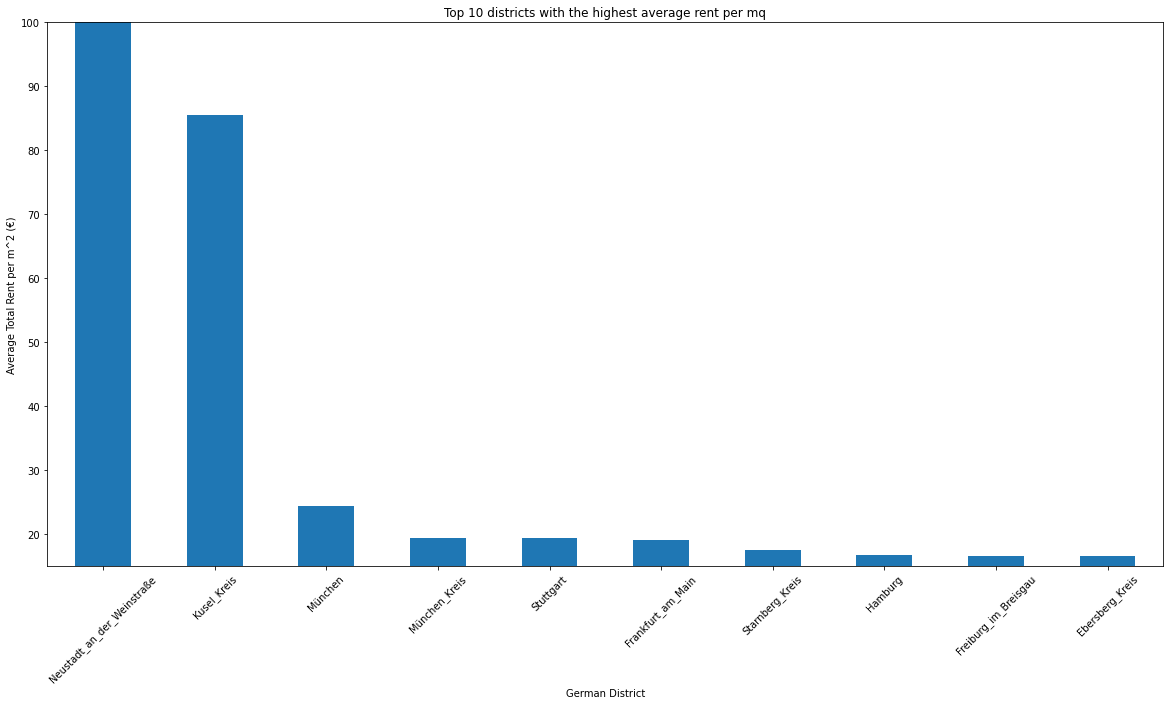

In [38]:
df.groupby('district')['per_living_space'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20, 10))
plt.title('Top 10 districts with the highest average rent per mq')
plt.ylabel('Average Total Rent per m^2 (€)')
plt.ylim(15, 100)
# plot xlabel at an angle of 45 degrees
plt.xticks(rotation=45)
plt.xlabel('German District')
plt.show()

In [39]:
df.groupby('district')['per_living_space'].mean().sort_values(ascending=False).head(10) # bars from upstairs with numbers

district
Neustadt_an_der_Weinstraße    3416.105559
Kusel_Kreis                     85.457200
München                         24.291576
München_Kreis                   19.350289
Stuttgart                       19.291821
Frankfurt_am_Main               19.107426
Starnberg_Kreis                 17.545703
Hamburg                         16.693529
Freiburg_im_Breisgau            16.556423
Ebersberg_Kreis                 16.529464
Name: per_living_space, dtype: float64

In [40]:
df.groupby('geo_plz')['totalRent'].mean() # average total rent per PLZ

geo_plz
1057      523.333333
1067     1105.199333
1069      618.281023
1097      791.404810
1099      699.021818
            ...     
99947     449.099545
99974     426.500000
99976     435.000000
99991     490.000000
99994     550.000000
Name: totalRent, Length: 5476, dtype: float64

In [41]:
df_b=df[df['district']!='Neustadt_an_der_Weinstraße'] # Neustadt is an outlier -> drop

<AxesSubplot:>

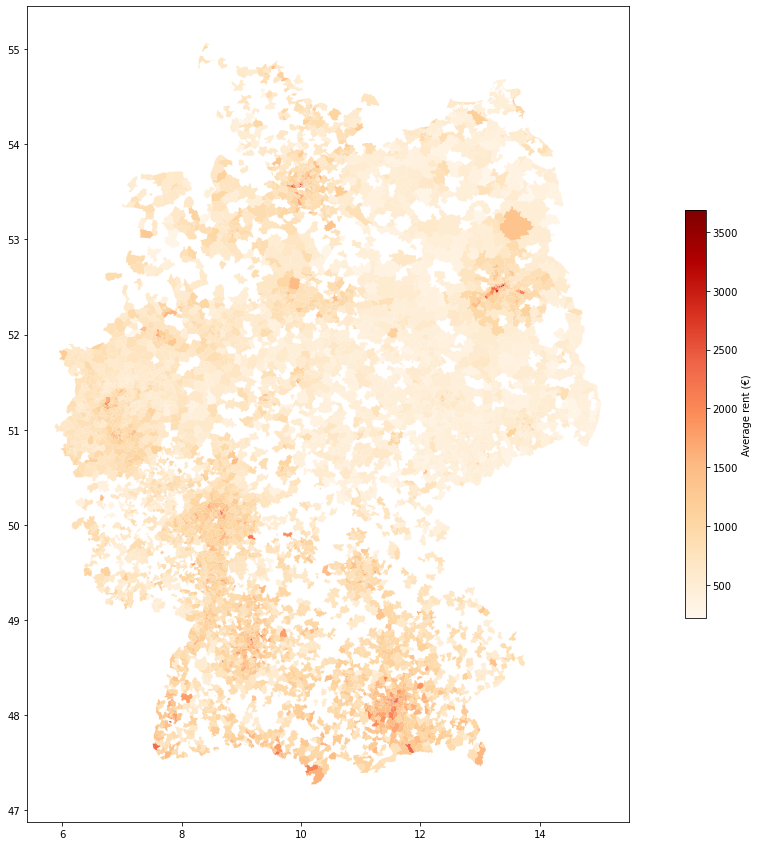

In [42]:
avg_by_plz = df_b.groupby('geo_plz')['totalRent'].mean().reset_index() # get the average rent by plz and plot the map

germ_avg_by_plz = germany_map.merge(avg_by_plz, left_on="plz", right_on="geo_plz") # join germany map with total rent

germ_avg_by_plz.plot(column='totalRent', figsize=(20, 15), cmap='OrRd', legend=True,
                                legend_kwds={'label': "Average rent (€)", 'orientation': "vertical", 'shrink': 0.5})

In [43]:
df.columns # list of columns

Index(['state', 'serviceCharge', 'heatingType', 'telekomTvOffer', 'newlyConst',
       'balcony', 'picturecount', 'pricetrend', 'telekomUploadSpeed',
       'totalRent', 'yearConstructed', 'scoutId', 'firingTypes', 'hasKitchen',
       'geo_bln', 'cellar', 'yearConstructedRange', 'baseRent', 'livingSpace',
       'geo_krs', 'street', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'floor', 'noRoomsRange', 'garden', 'livingSpaceRange',
       'district', 'town', 'description', 'facilities', 'date',
       'per_living_space'],
      dtype='object')

<AxesSubplot:>

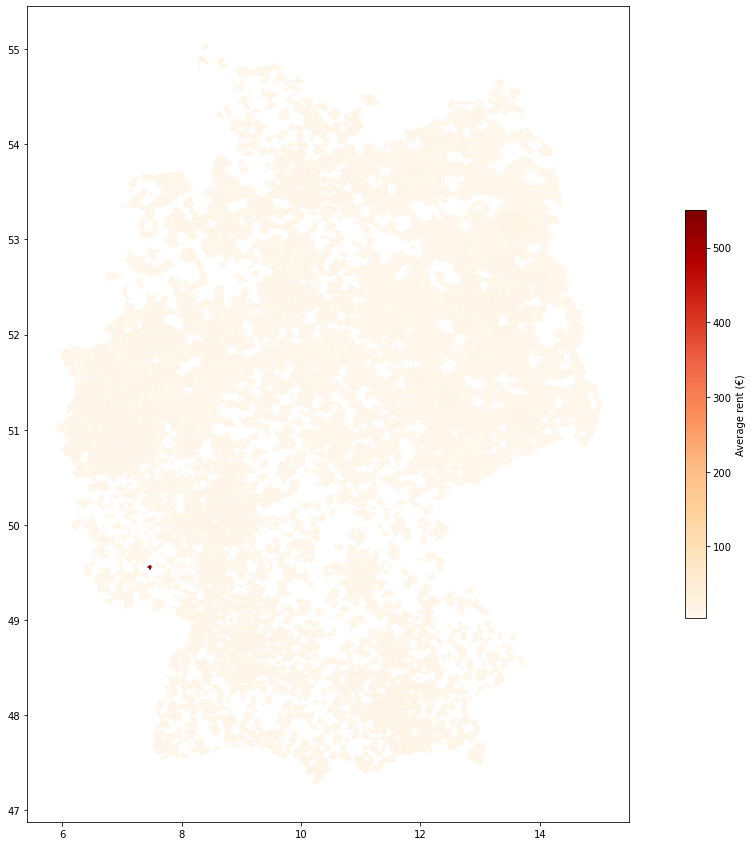

In [44]:
avg_by_plz = df_b.groupby('geo_plz')['per_living_space'].mean().reset_index() # get the average rent by plz and plot the map

germ_avg_by_plz = germany_map.merge(avg_by_plz, left_on="plz", right_on="geo_plz")

germ_avg_by_plz.plot(column='per_living_space', figsize=(20, 15), cmap='OrRd', legend=True,
                     legend_kwds={'label': "Average rent (€)", 'orientation': "vertical", 'shrink': 0.5})

In [ ]:
#German map above is not acceptable! The reason is that outliers are affecting the steps between bin of feature 'per living space'

In [45]:
#Excluding the outliers

df_b=df[df['geo_plz']!=66885]
df_b=df_b[df_b['geo_plz']!=67434]

<AxesSubplot:>

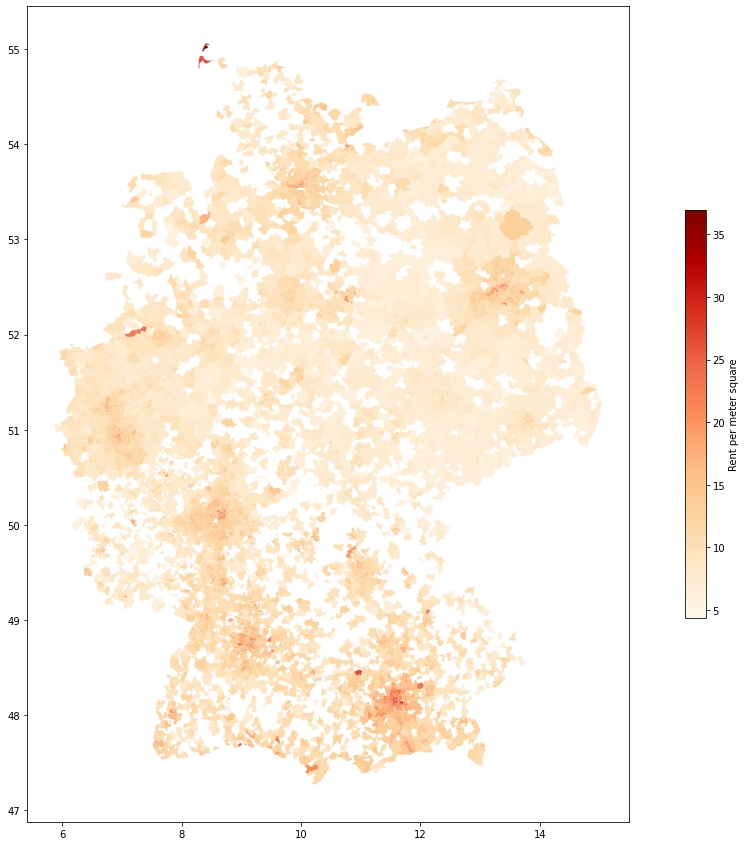

In [46]:
# get the average rent by plz and plot the map
avg_by_plz = df_b.groupby('geo_plz')['per_living_space'].mean().reset_index()

germ_avg_by_plz = germany_map.merge(avg_by_plz, left_on="plz", right_on="geo_plz")

germ_avg_by_plz.plot(column='per_living_space', figsize=(20, 15), cmap='OrRd', legend=True,
                     legend_kwds={'label': "Rent per meter square", 'orientation': "vertical", 'shrink': 0.5})

In [47]:
df_b.groupby('geo_plz')['per_living_space'].mean().sort_values(ascending=False) # numbers in the map

geo_plz
25992    36.923077
60312    34.406888
80797    33.500914
80539    31.794598
80331    30.496653
           ...    
38381     4.754601
56766     4.750000
34439     4.492937
36355     4.458333
29462     4.371429
Name: per_living_space, Length: 5474, dtype: float64

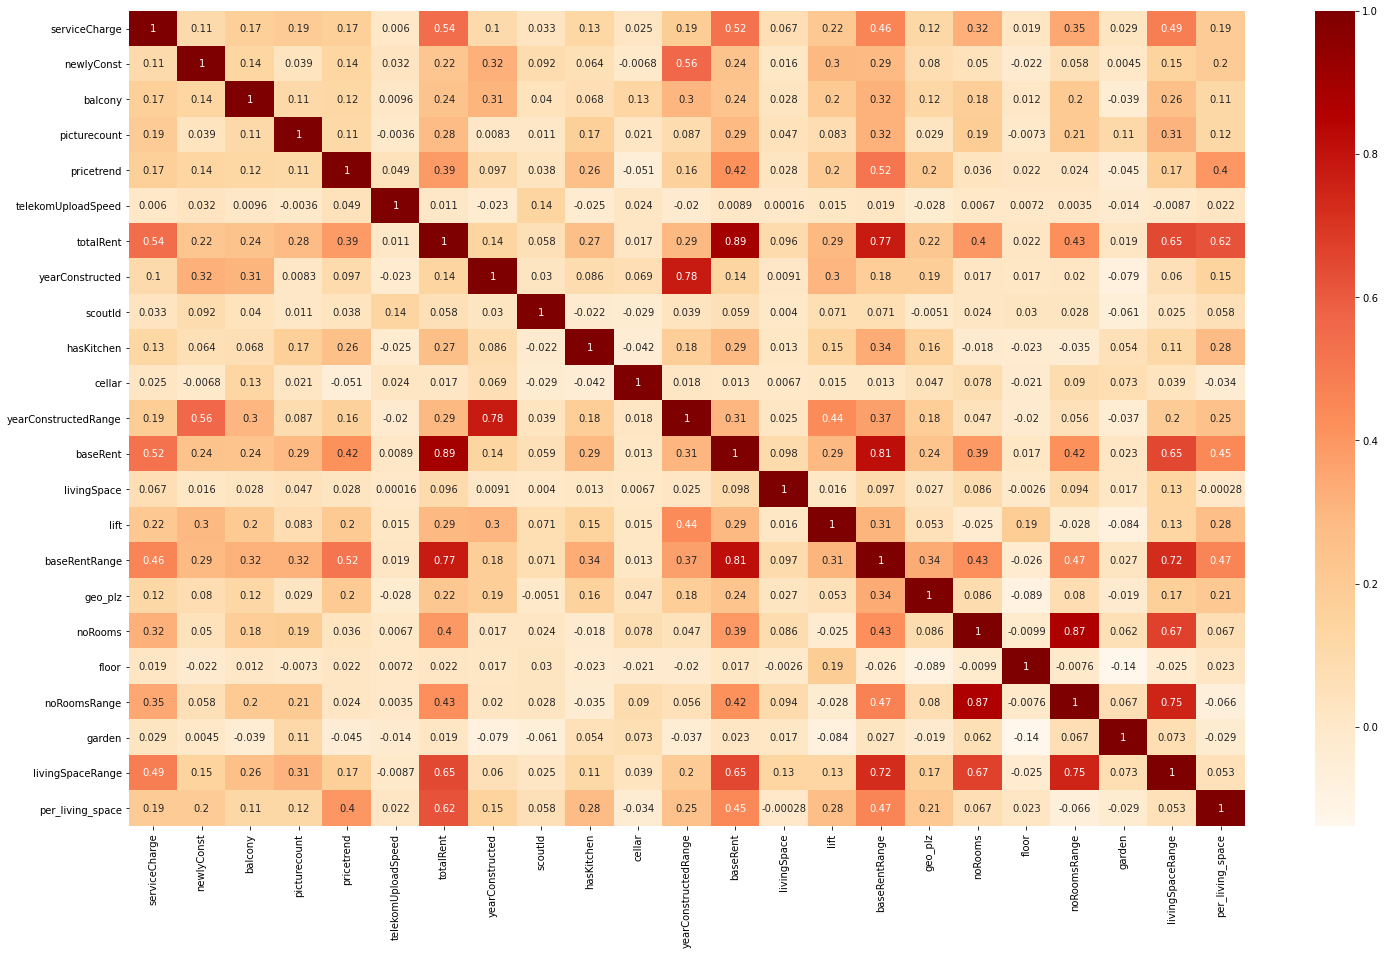

In [39]:
# plot the correlation between columns and total rent and unit rent
plt.figure(figsize=(25, 15))
sns.heatmap(df_b.corr(), annot=True, cmap='OrRd')
plt.show()

In [48]:
df_b.corr()['totalRent'].sort_values(ascending=False) # top correlation features with total rent

totalRent               1.000000
baseRent                0.894787
baseRentRange           0.774055
livingSpaceRange        0.647767
per_living_space        0.618921
serviceCharge           0.543492
noRoomsRange            0.425653
noRooms                 0.398621
pricetrend              0.386918
yearConstructedRange    0.294939
lift                    0.293550
picturecount            0.281594
hasKitchen              0.266876
balcony                 0.240221
newlyConst              0.222888
geo_plz                 0.219199
yearConstructed         0.141049
livingSpace             0.096190
scoutId                 0.058086
floor                   0.021855
garden                  0.018773
cellar                  0.017275
telekomUploadSpeed      0.010824
Name: totalRent, dtype: float64

In [49]:
#save=df_b #This is just a security backup

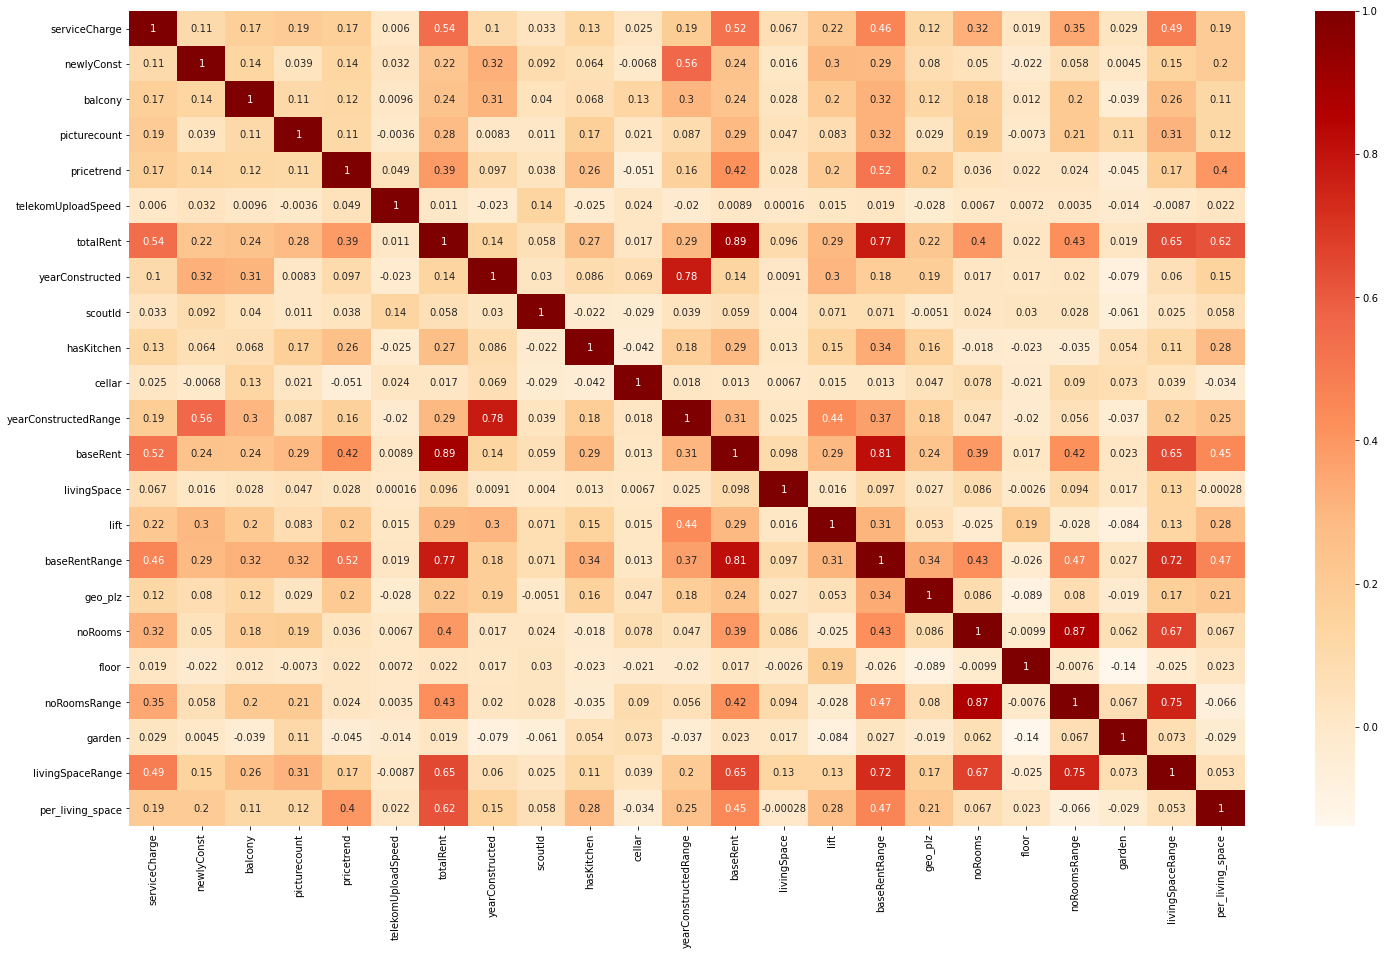

In [50]:
plt.figure(figsize=(25, 15))
sns.heatmap(df_b.corr(), annot=True, cmap='OrRd')
plt.show()

<AxesSubplot:>

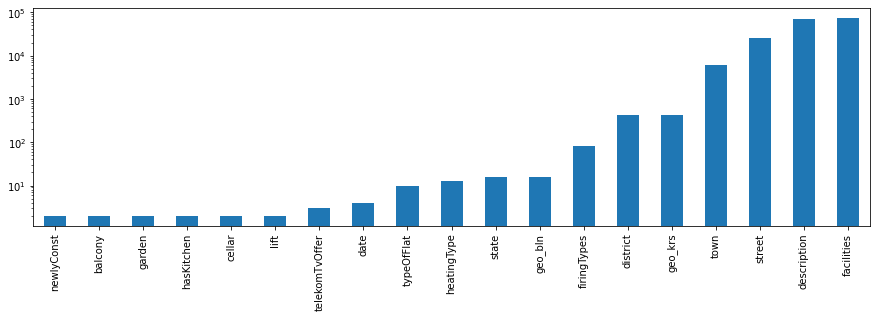

In [283]:
#unique_values -> number of unique values per coloumn eg. facilities as Freitext and balcony is yes / no (2 features) ; numbers excluded

# Structure of non-numerical data
unique_values2=df_b.select_dtypes(exclude="number").nunique().sort_values()
unique_values2.plot.bar(logy=True, figsize=(15,4))

<AxesSubplot:>

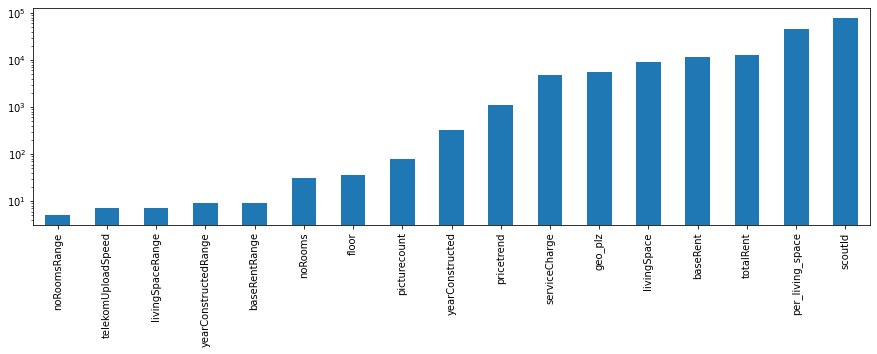

In [284]:
# Structure of numerical feutures (Unique Values per Feature) -> same as above just for numbers

unique_values=df_b.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15,4))

<AxesSubplot:>

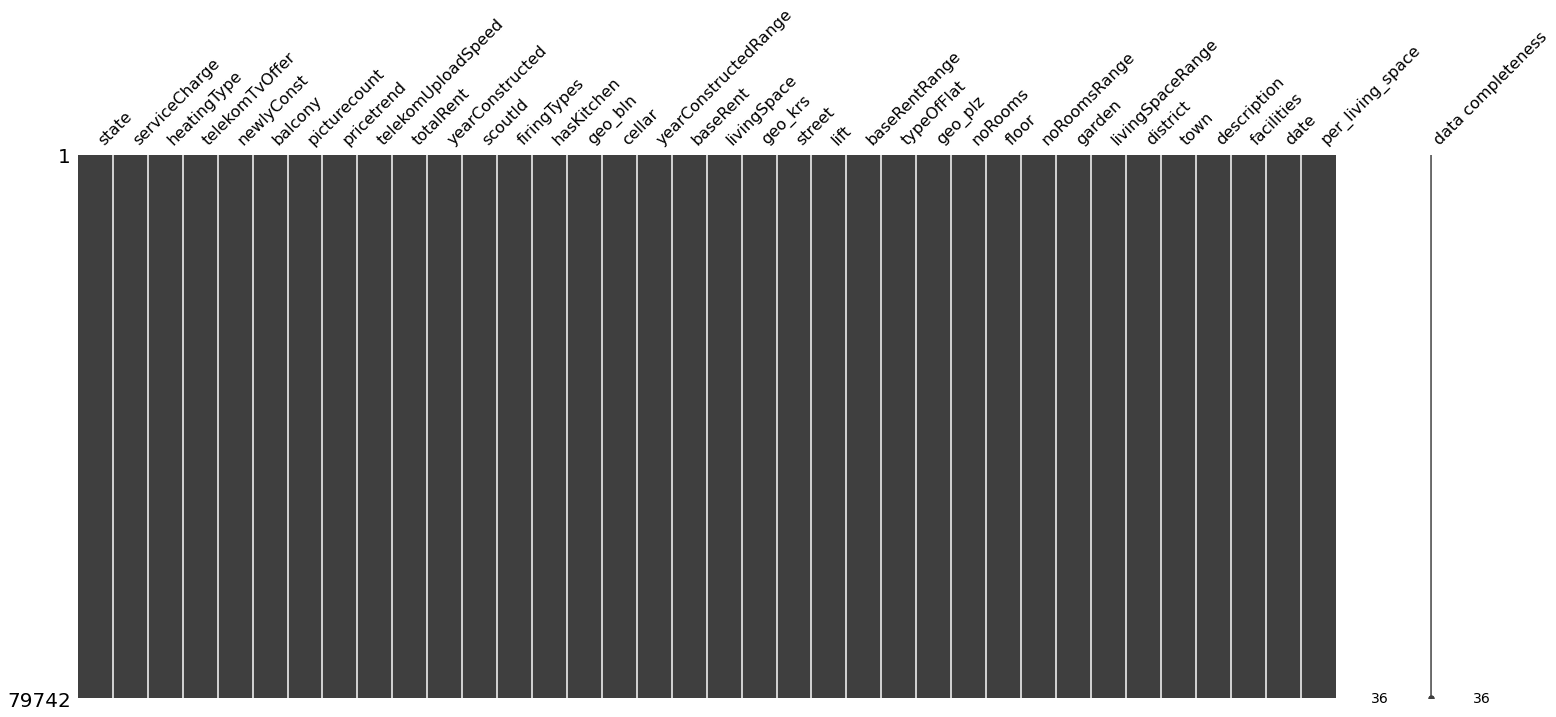

In [51]:
import missingno as msno # same as above on a graph

figsize=(10,3)
msno.matrix(df_b, labels=True, sort="descending")

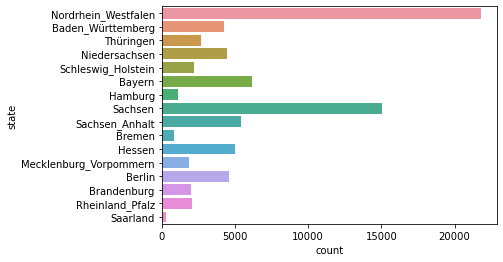

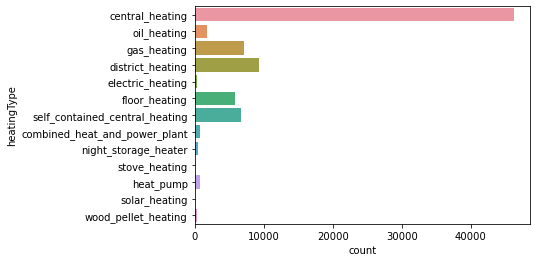

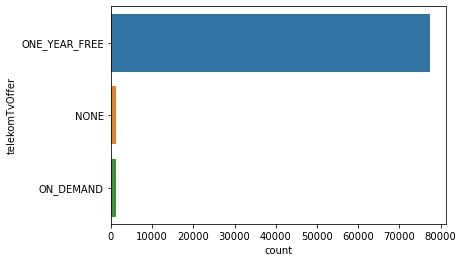

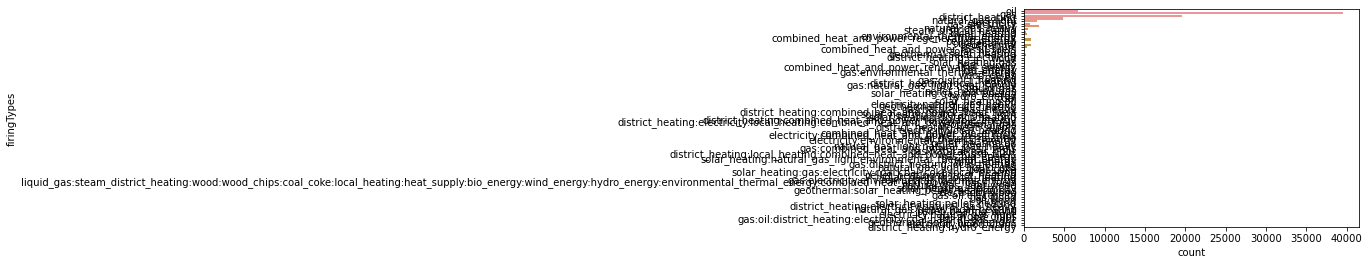

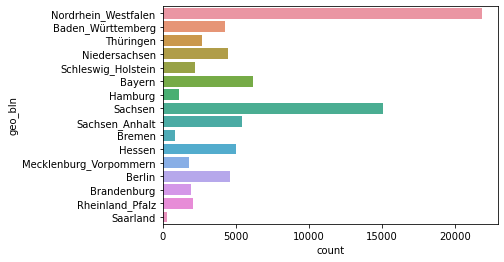

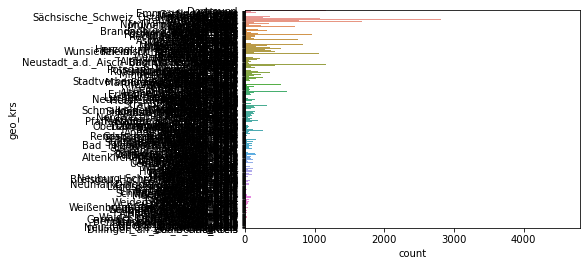

KeyboardInterrupt: 

In [288]:
# Count of non-numerical features -> occurences of object coloumns

for column in df_b.select_dtypes(include='object'):
    sns.countplot(y=column, data=df)
    plt.show()


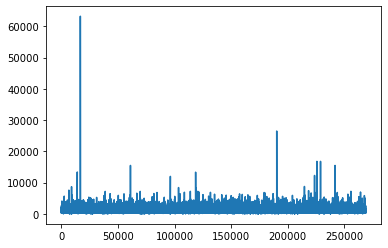

In [289]:
plt.plot(df_b['totalRent']) # overview of total rent -> there are a couple of outliers

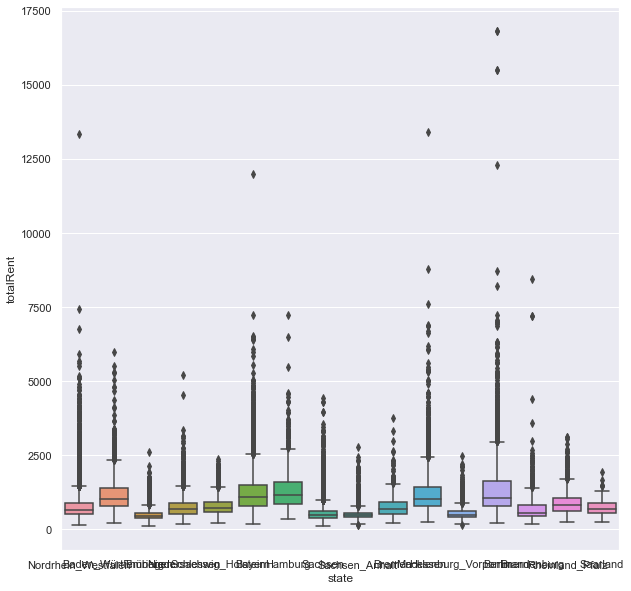

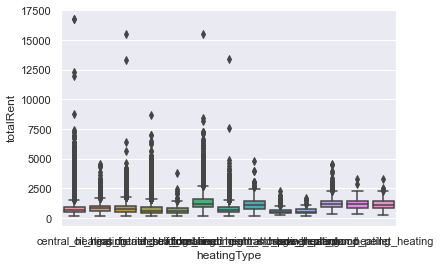

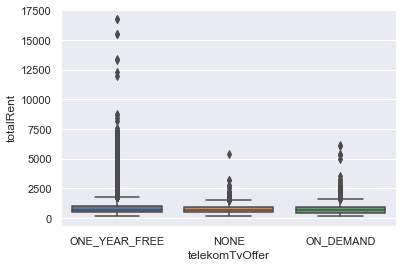

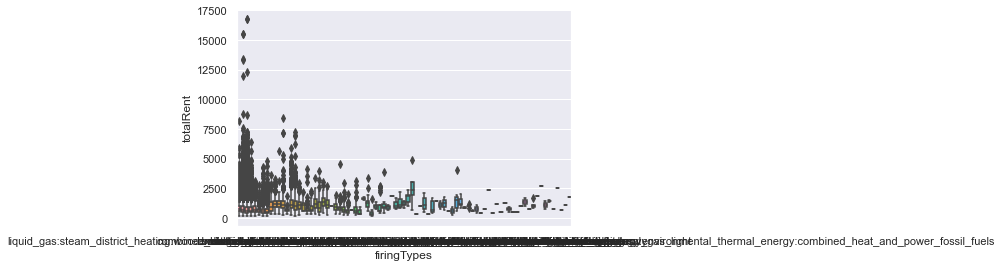

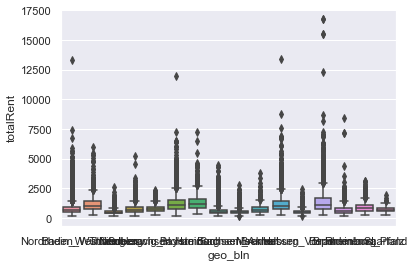

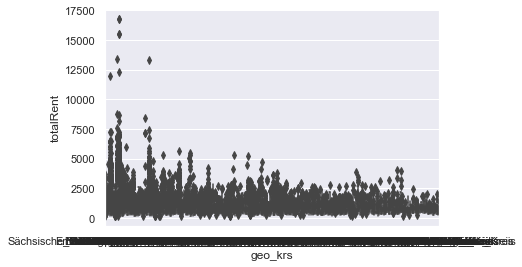

KeyboardInterrupt: 

In [232]:
#BoxPlot for the Discrete Variables with respect to total rent

fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1)


for column in df_b.select_dtypes(include='object'):
    sns.boxplot(y="totalRent", x=column, data=df_b)
    plt.show()

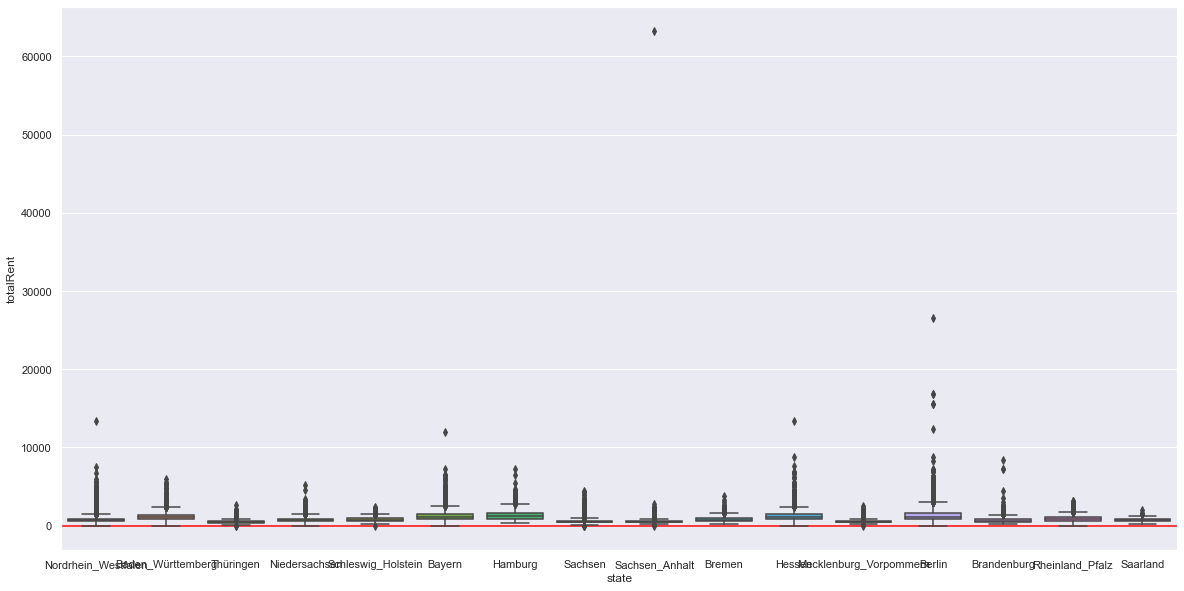

In [291]:
sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(20,10))
ax.axhline(0, color="red")
sns.boxplot(y="totalRent", x="state", data=df_b)
plt.show()


<AxesSubplot:xlabel='totalRent'>

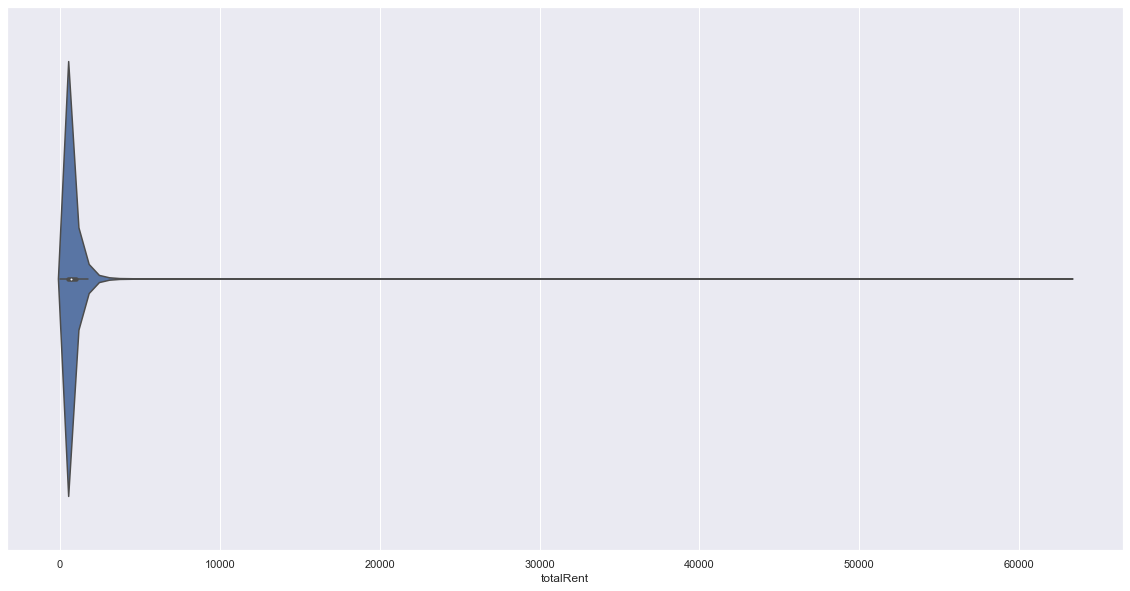

In [293]:
# Violin Plot
sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(20,10))
sns.violinplot(x=df_b["totalRent"])

<AxesSubplot:xlabel='totalRent', ylabel='livingSpace'>

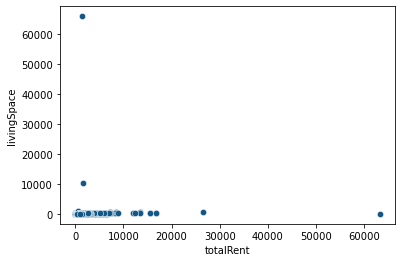

In [52]:
sns.scatterplot(data=df_b, x='totalRent', y='livingSpace', color='#125786', s=40)

In [53]:
#The above map shows us that there are still outliers in the dataset, which need to be handled

In [54]:
# identifying and dropping outliers
df_b=df_b[df_b['livingSpace']<9000]

In [55]:
# identifying and dropping outliers
df_b=df_b[df_b['totalRent']<20000]

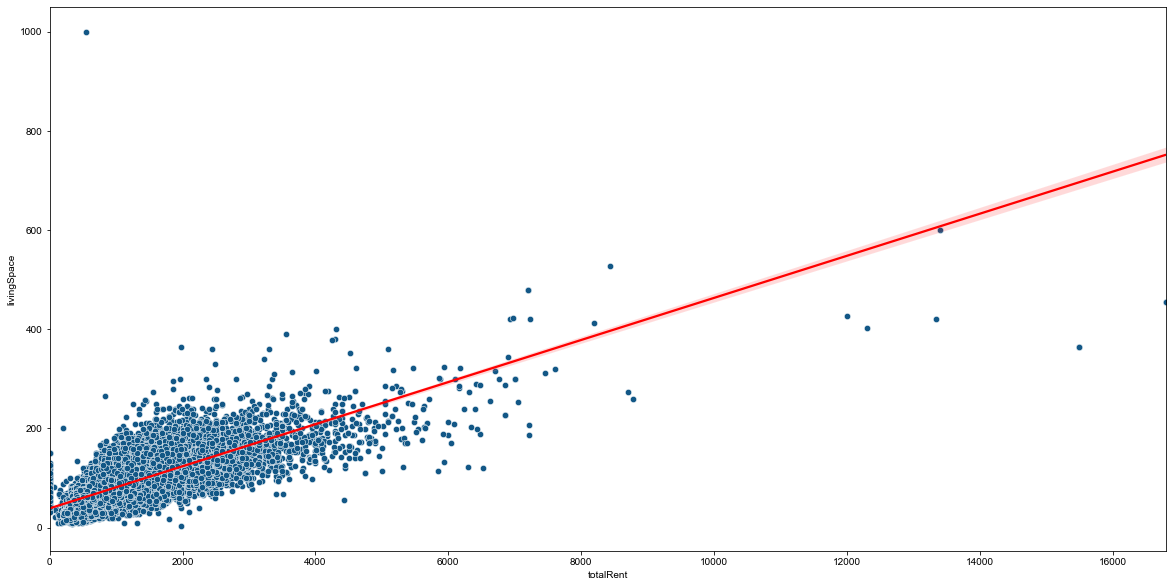

In [56]:
fig, ax = plt.subplots(figsize=(20,10)) # scatter plot total rent vs. living space mq
sns.set(font_scale=1)
sns.scatterplot(data=df_b, x='totalRent', y='livingSpace', color='#125786', s=40)
sns.regplot(data=df_b, x="totalRent", y="livingSpace", scatter=False, ax=ax, color="red")
plt.show()

In [57]:
df_b=df_b[df_b['totalRent']!=0] # keep rows where total rent is not 0
df_b=df_b[df_b['totalRent']>100] # keep rows where total rent is more than 100
df_b=df_b[df_b['livingSpace']<610] # keep rows where living space is less than 610

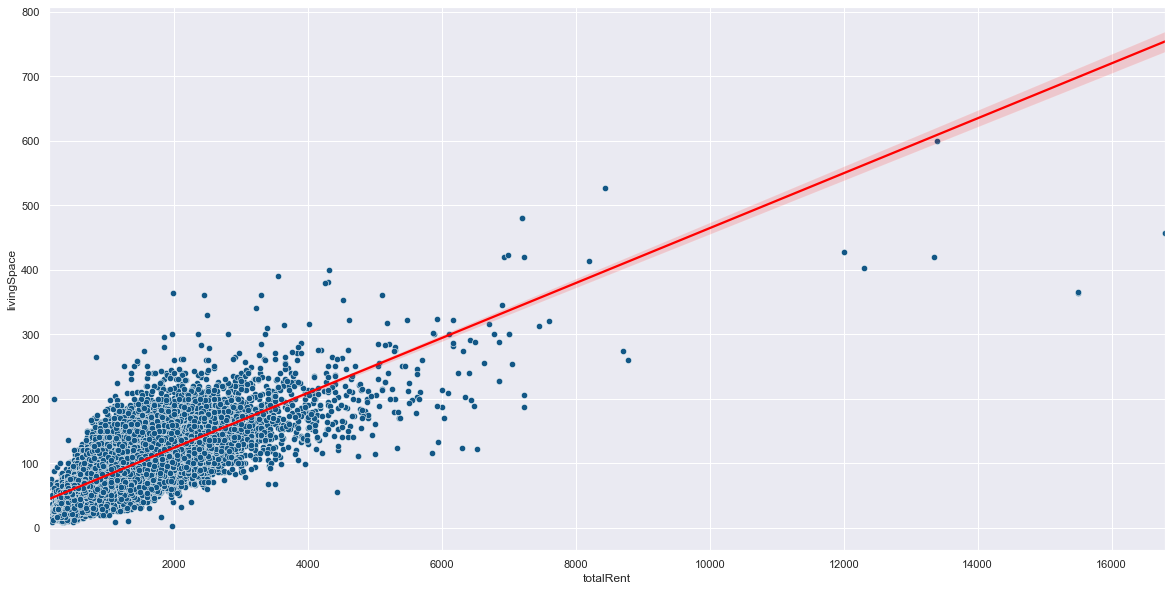

In [58]:
fig, ax = plt.subplots(figsize=(20,10)) # redo graph without outliers
sns.set(font_scale=1)
sns.scatterplot(data=df_b, x='totalRent', y='livingSpace', color='#125786', s=40)
sns.regplot(data=df_b, x="totalRent", y="livingSpace", scatter=False, ax=ax, color="red")
plt.show()

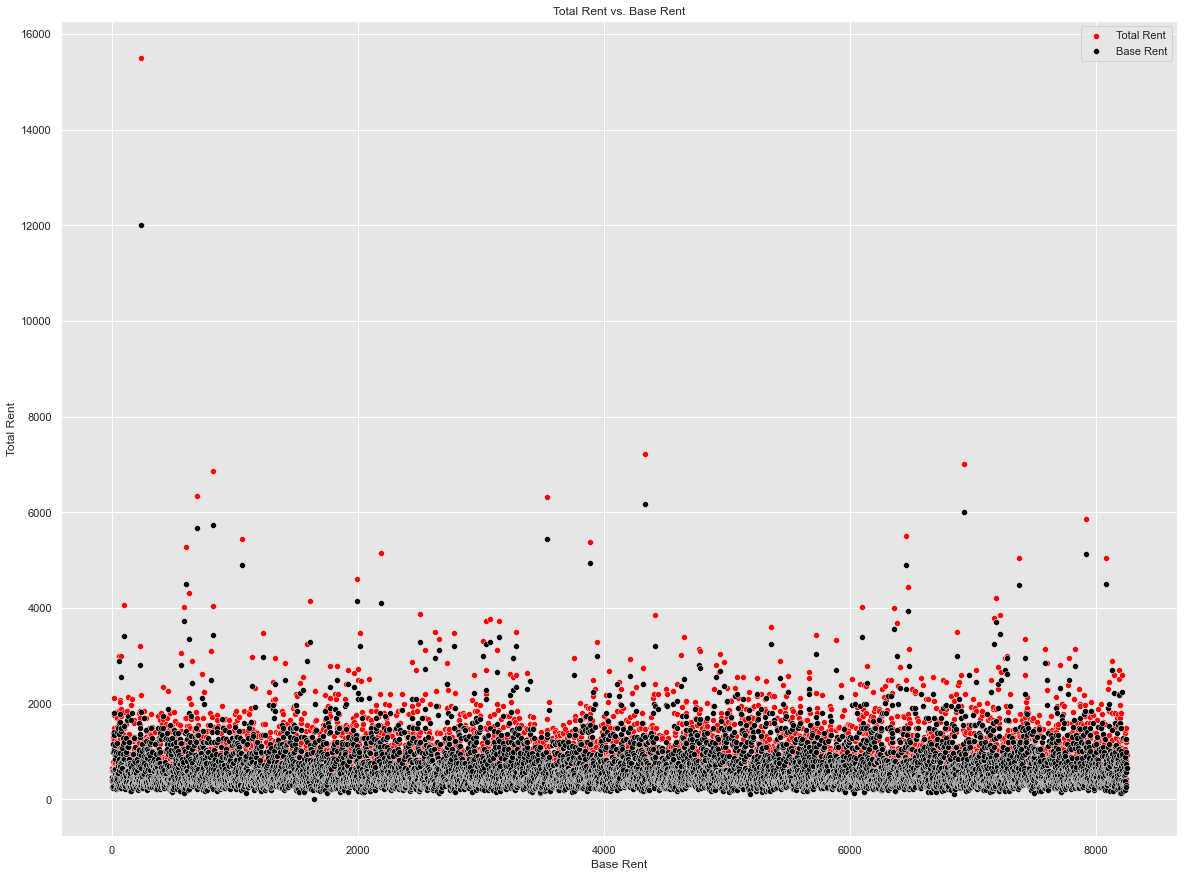

In [59]:
# some pretty graph
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(20,15))

ylim=(0,8251)
ax=sns.scatterplot(y="totalRent",x=range(0,8251),data=df_b.iloc[-8251:], color="red") #RefSt
sns.scatterplot(y="baseRent",x=range(0,8251),data=df_b.iloc[-8251:], color="black").set(title='Total Rent vs. Base Rent')
plt.legend(labels = ['Total Rent', 'Base Rent'])
ax.set(ylabel="Total Rent",xlabel="Base Rent")
plt.show()

In [ ]:
#Above map does not have any meaning it is just a sandbox map

In [60]:
sns.set(font_scale=0.8) #setting the font

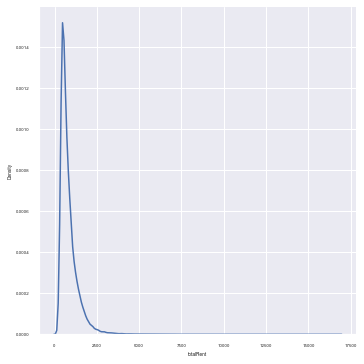

In [328]:
# Plots the PDF for each numerical feature in a separate subplot
sns.displot(df_b,x="totalRent",kind="kde")
#df.hist(bins=25, figsize=(30, 5), layout=(-1, 7), edgecolor="black")
plt.tight_layout()

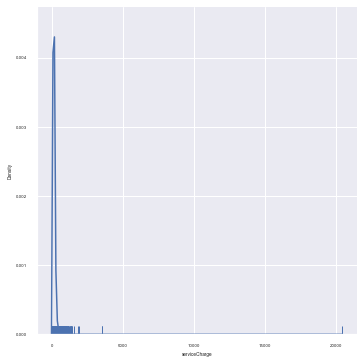

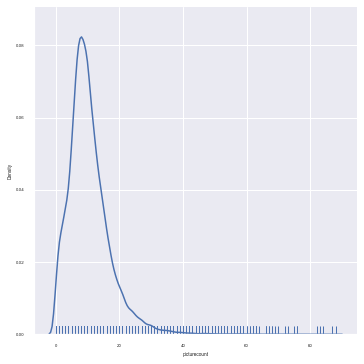

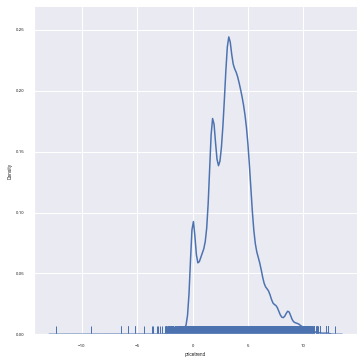

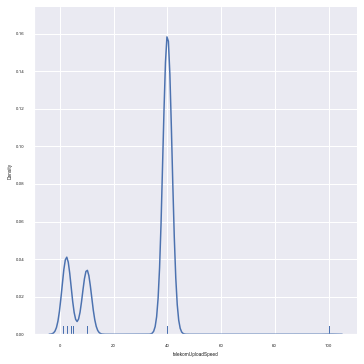

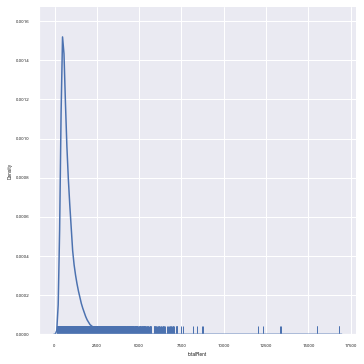

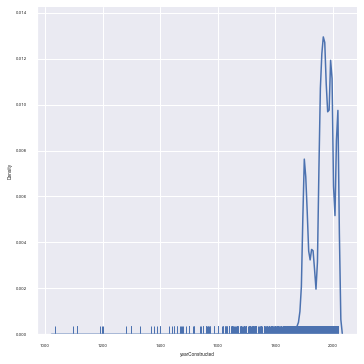

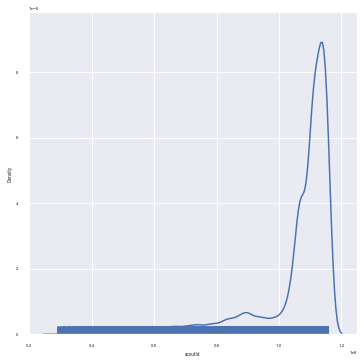

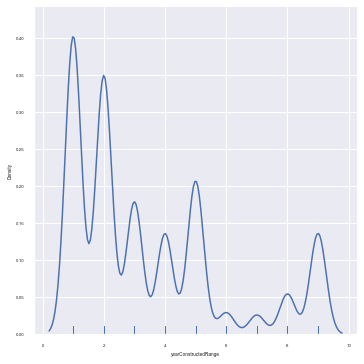

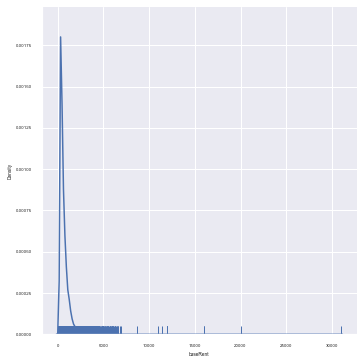

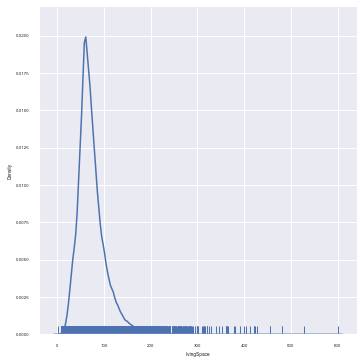

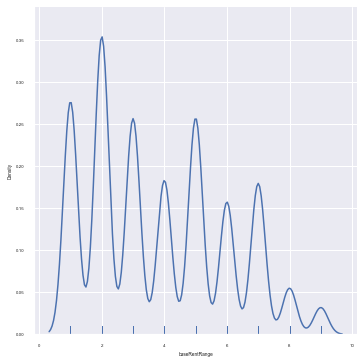

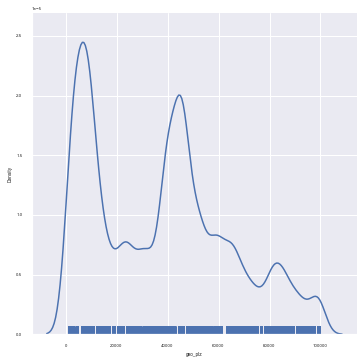

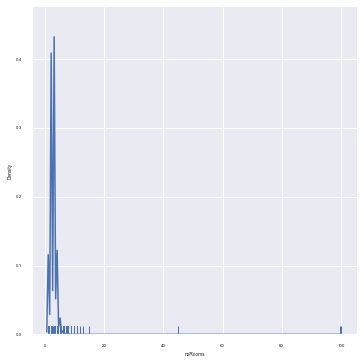

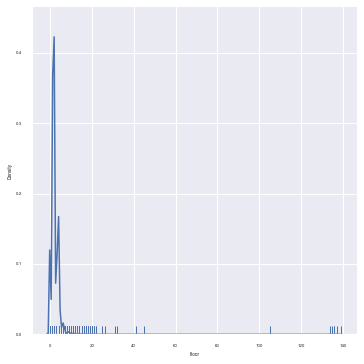

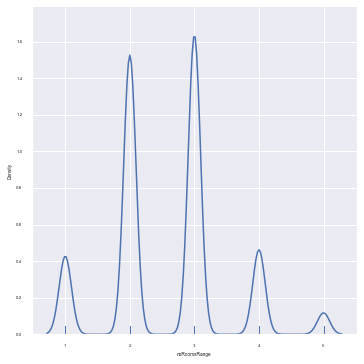

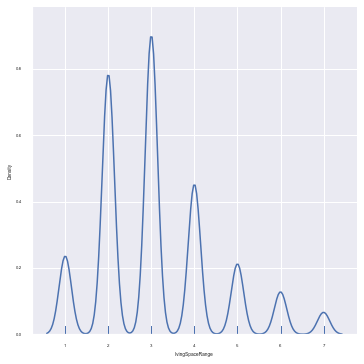

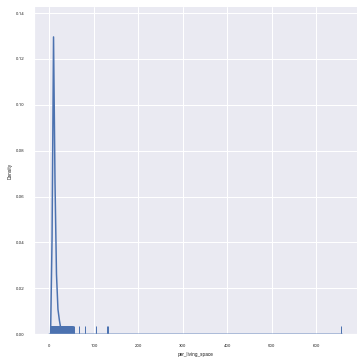

In [329]:
for column in df_b.select_dtypes(include='number'):
    sns.displot( x=column, data=df_b, kind="kde",rug=True)
    plt.tight_layout()


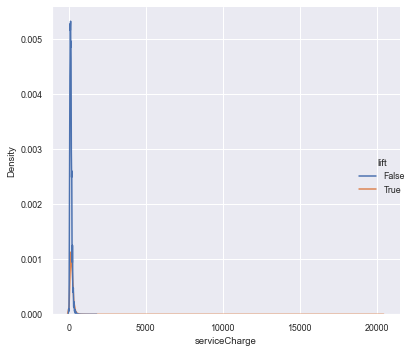

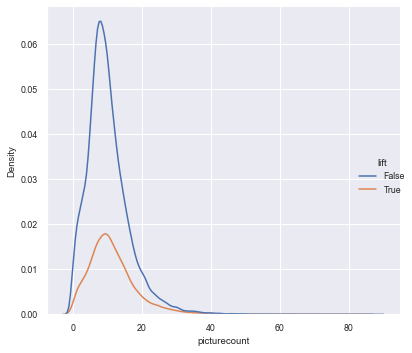

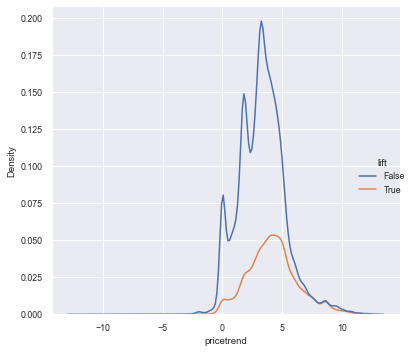

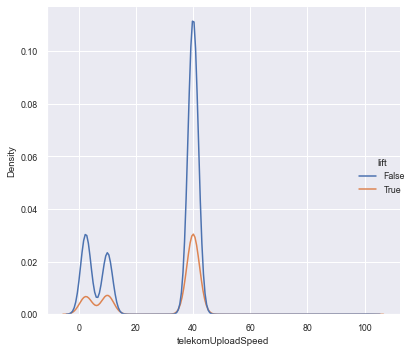

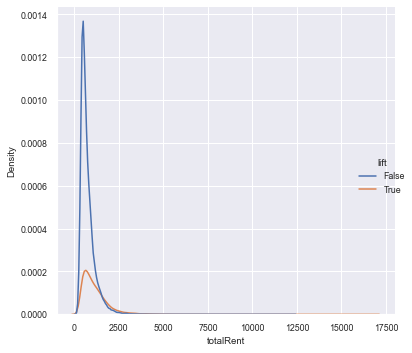

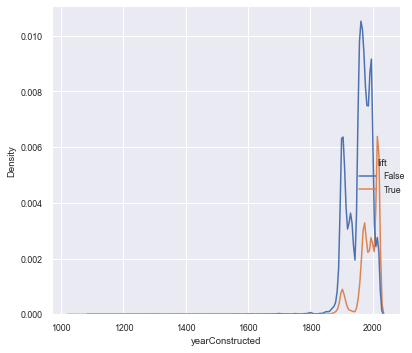

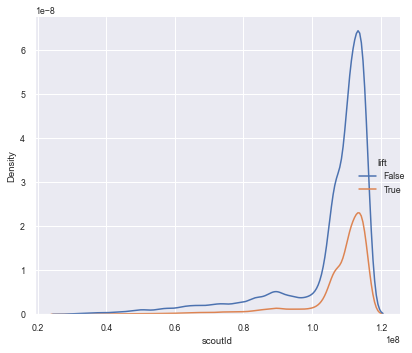

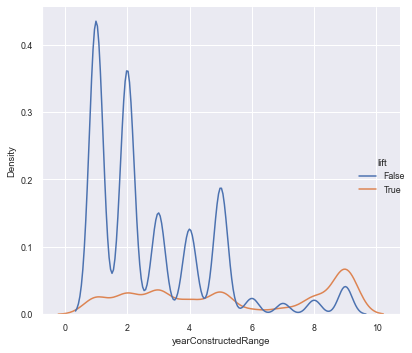

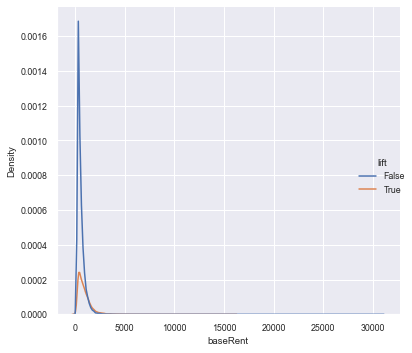

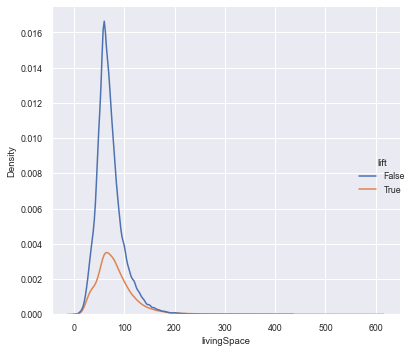

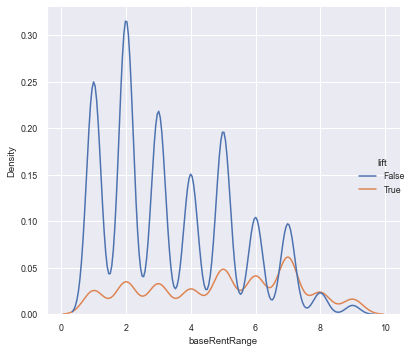

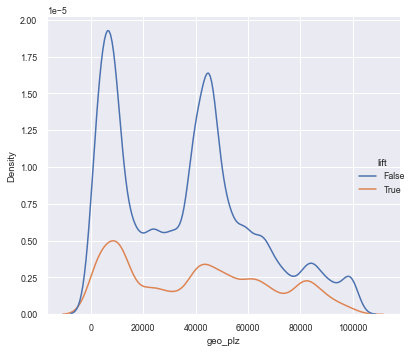

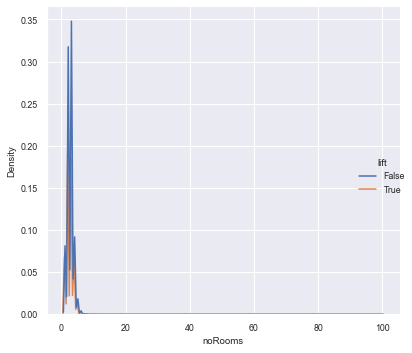

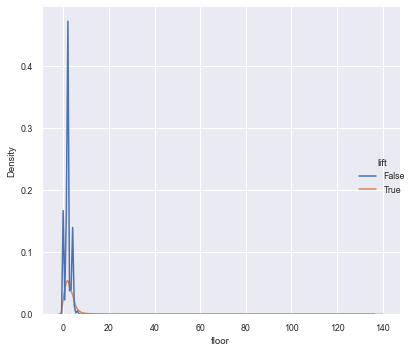

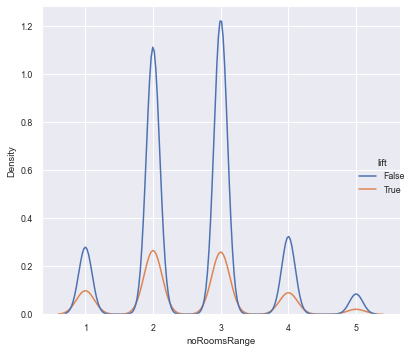

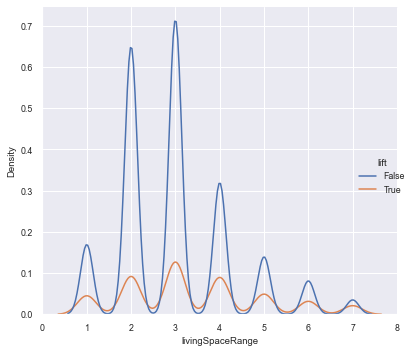

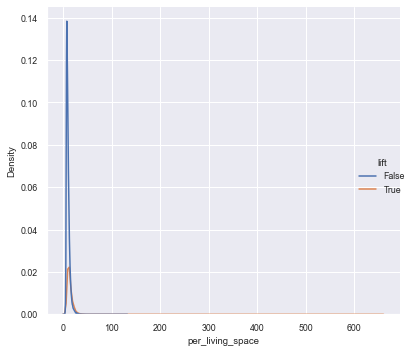

In [334]:
for column in df.select_dtypes(include='number'):
    sns.displot( x=column, data=df_b, kind="kde",hue="lift")
    plt.tight_layout()

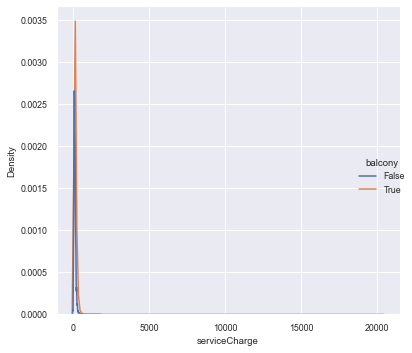

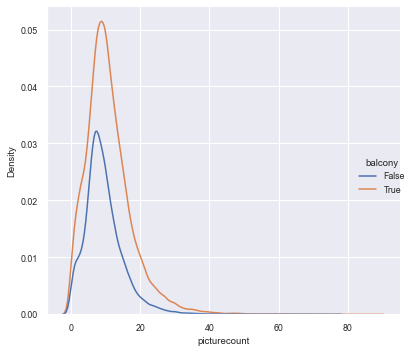

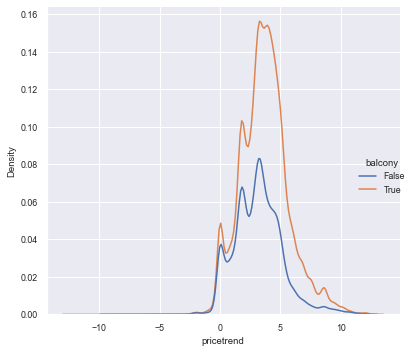

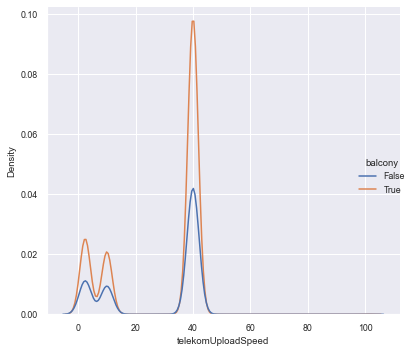

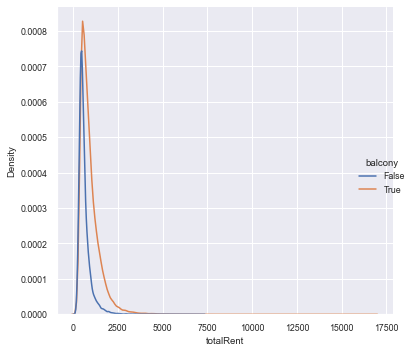

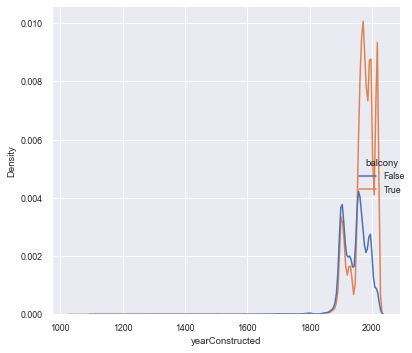

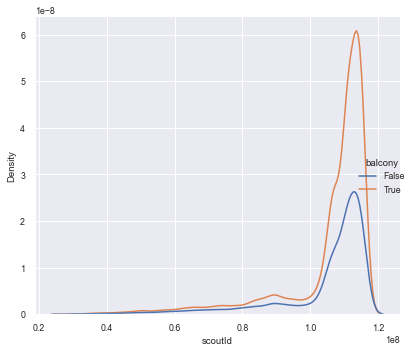

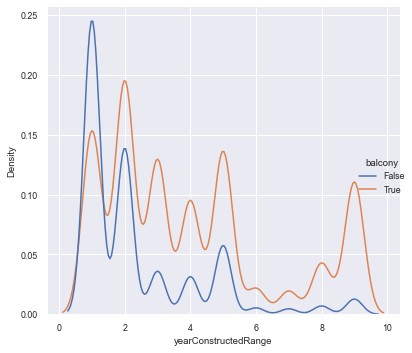

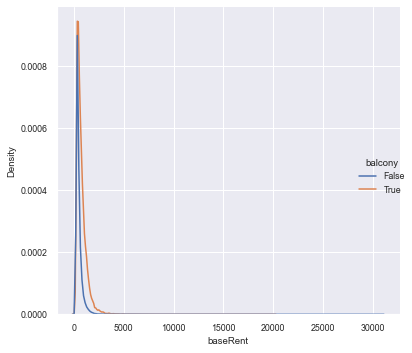

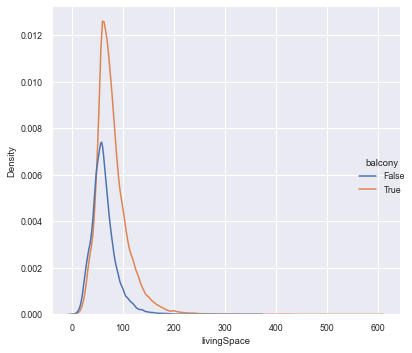

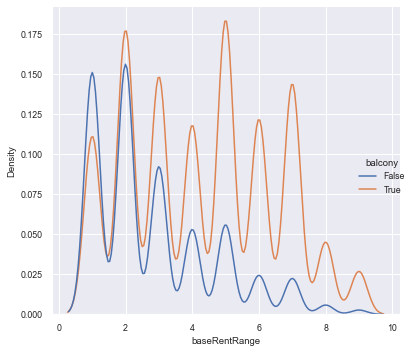

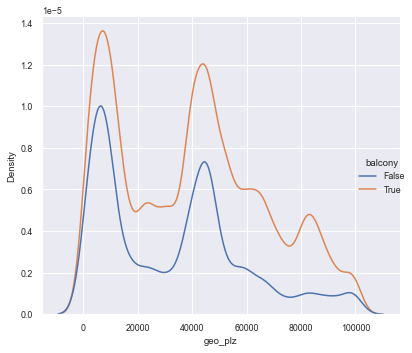

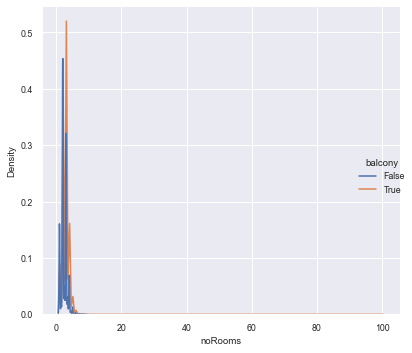

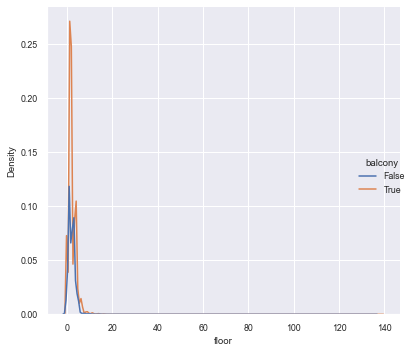

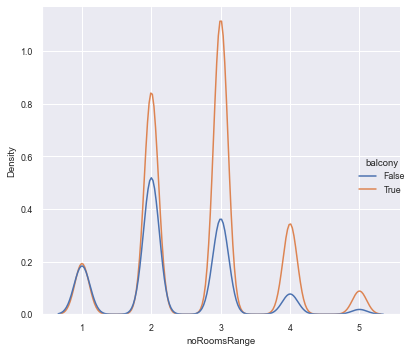

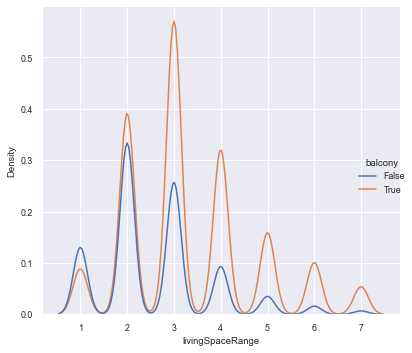

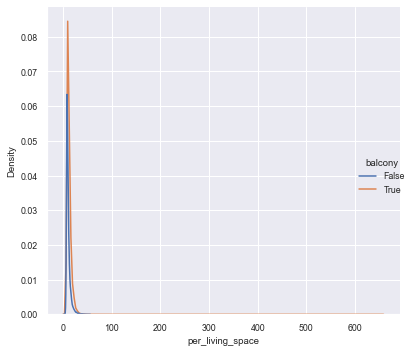

In [335]:
for column in df.select_dtypes(include='number'):
    sns.displot( x=column, data=df_b, kind="kde",hue="balcony")
    plt.tight_layout()

In [336]:
import scipy.stats as stats

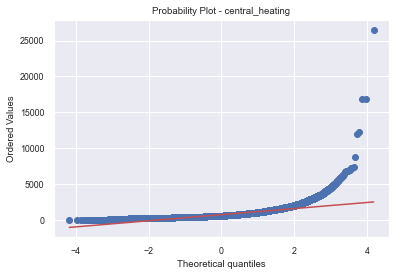

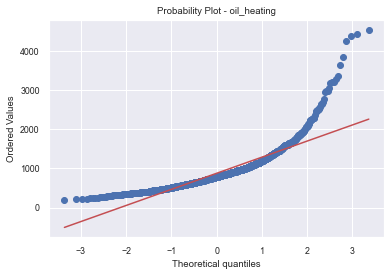

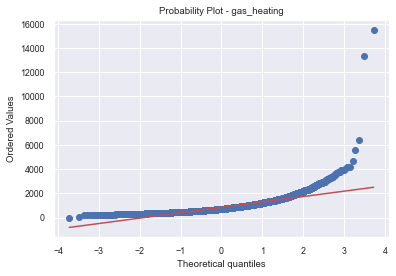

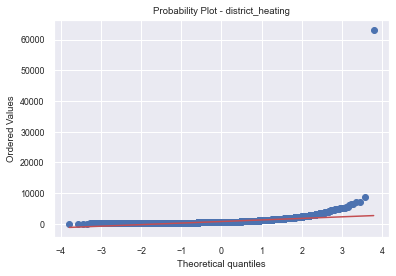

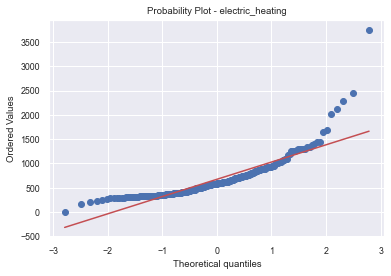

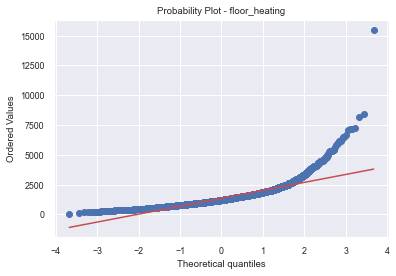

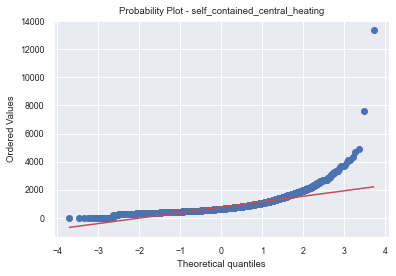

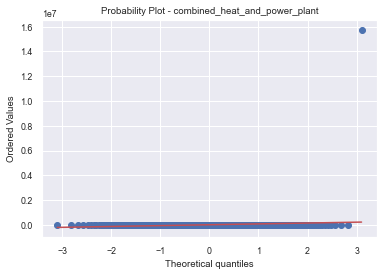

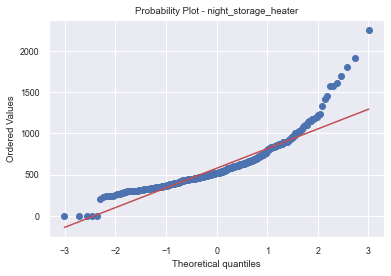

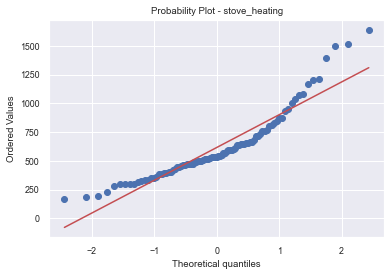

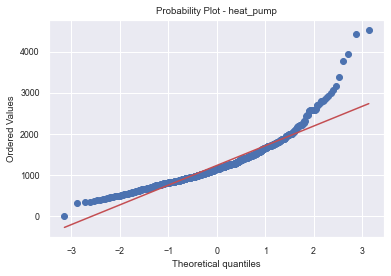

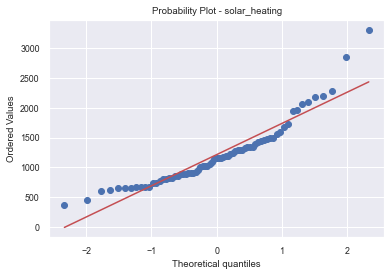

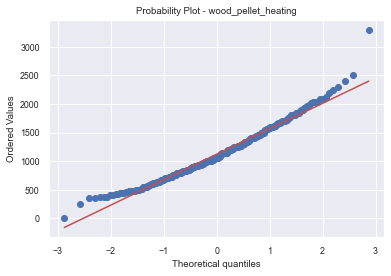

In [337]:
unique_majors = df_b['heatingType'].unique()
for major in unique_majors:
    stats.probplot(df[df['heatingType'] == major]['totalRent'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

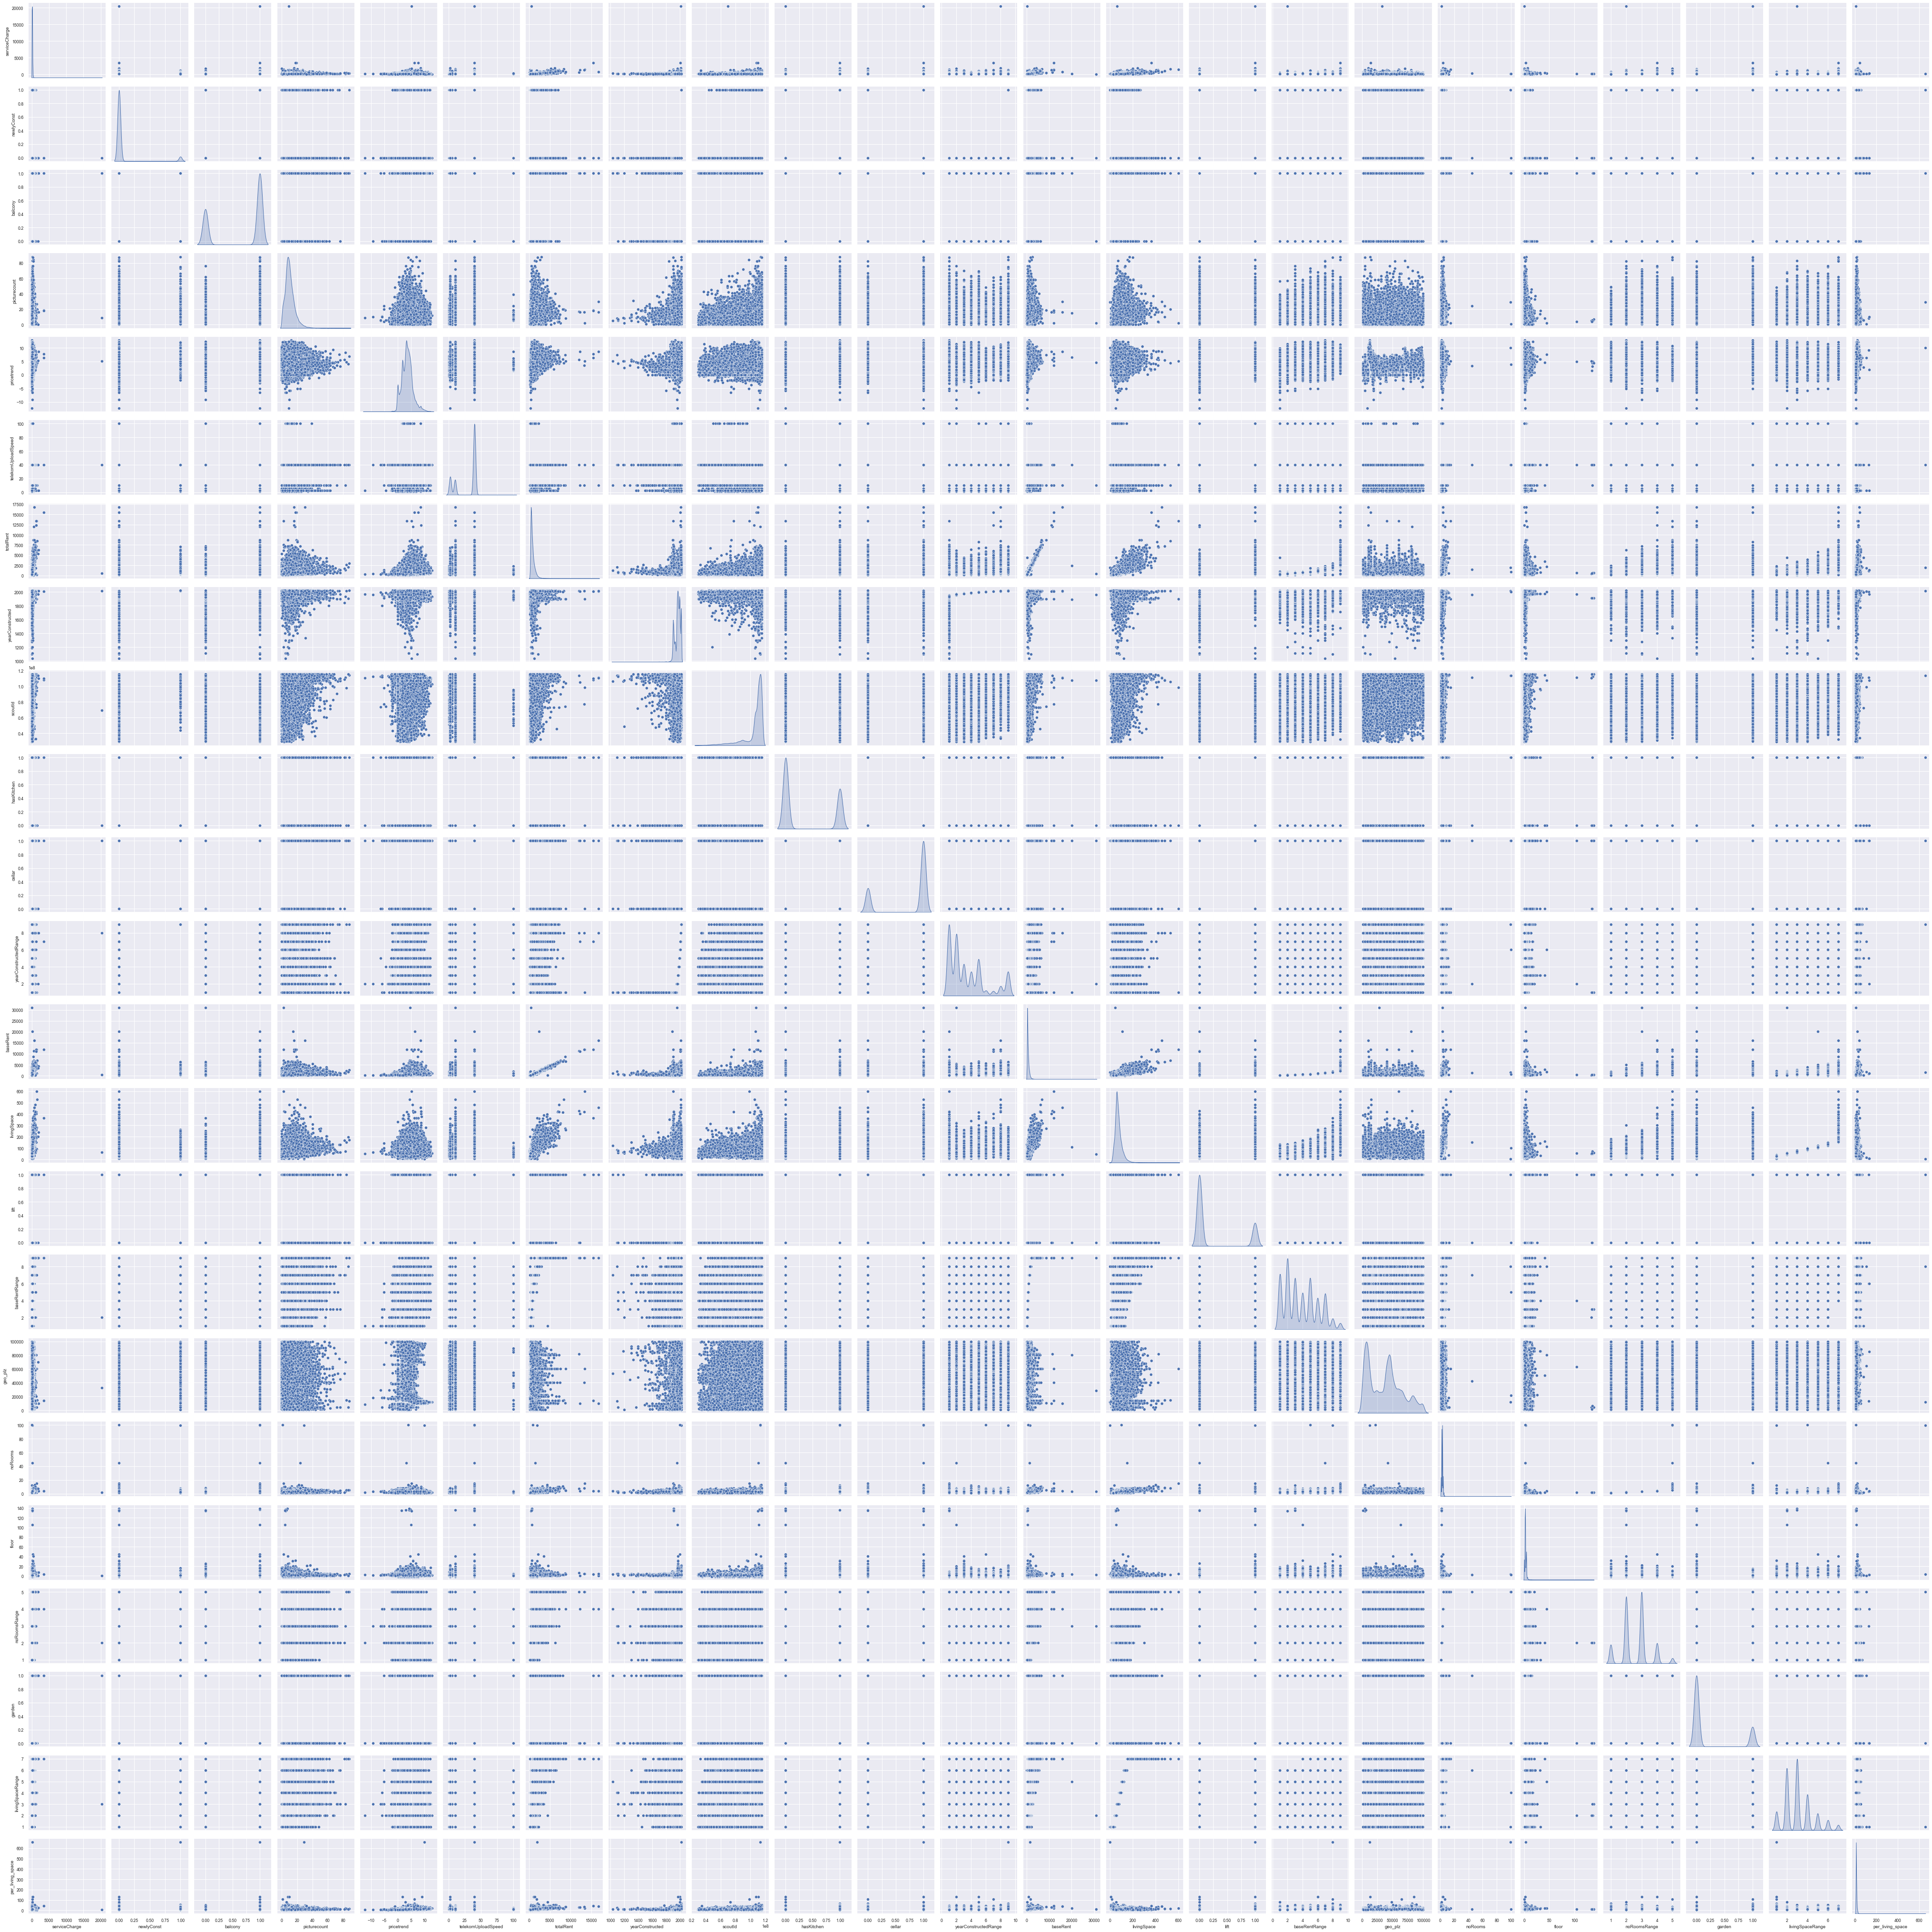

In [338]:
sns.pairplot(data=df_b, diag_kind='kde') # scatter plot for distribution of all numerical features
plt.show()

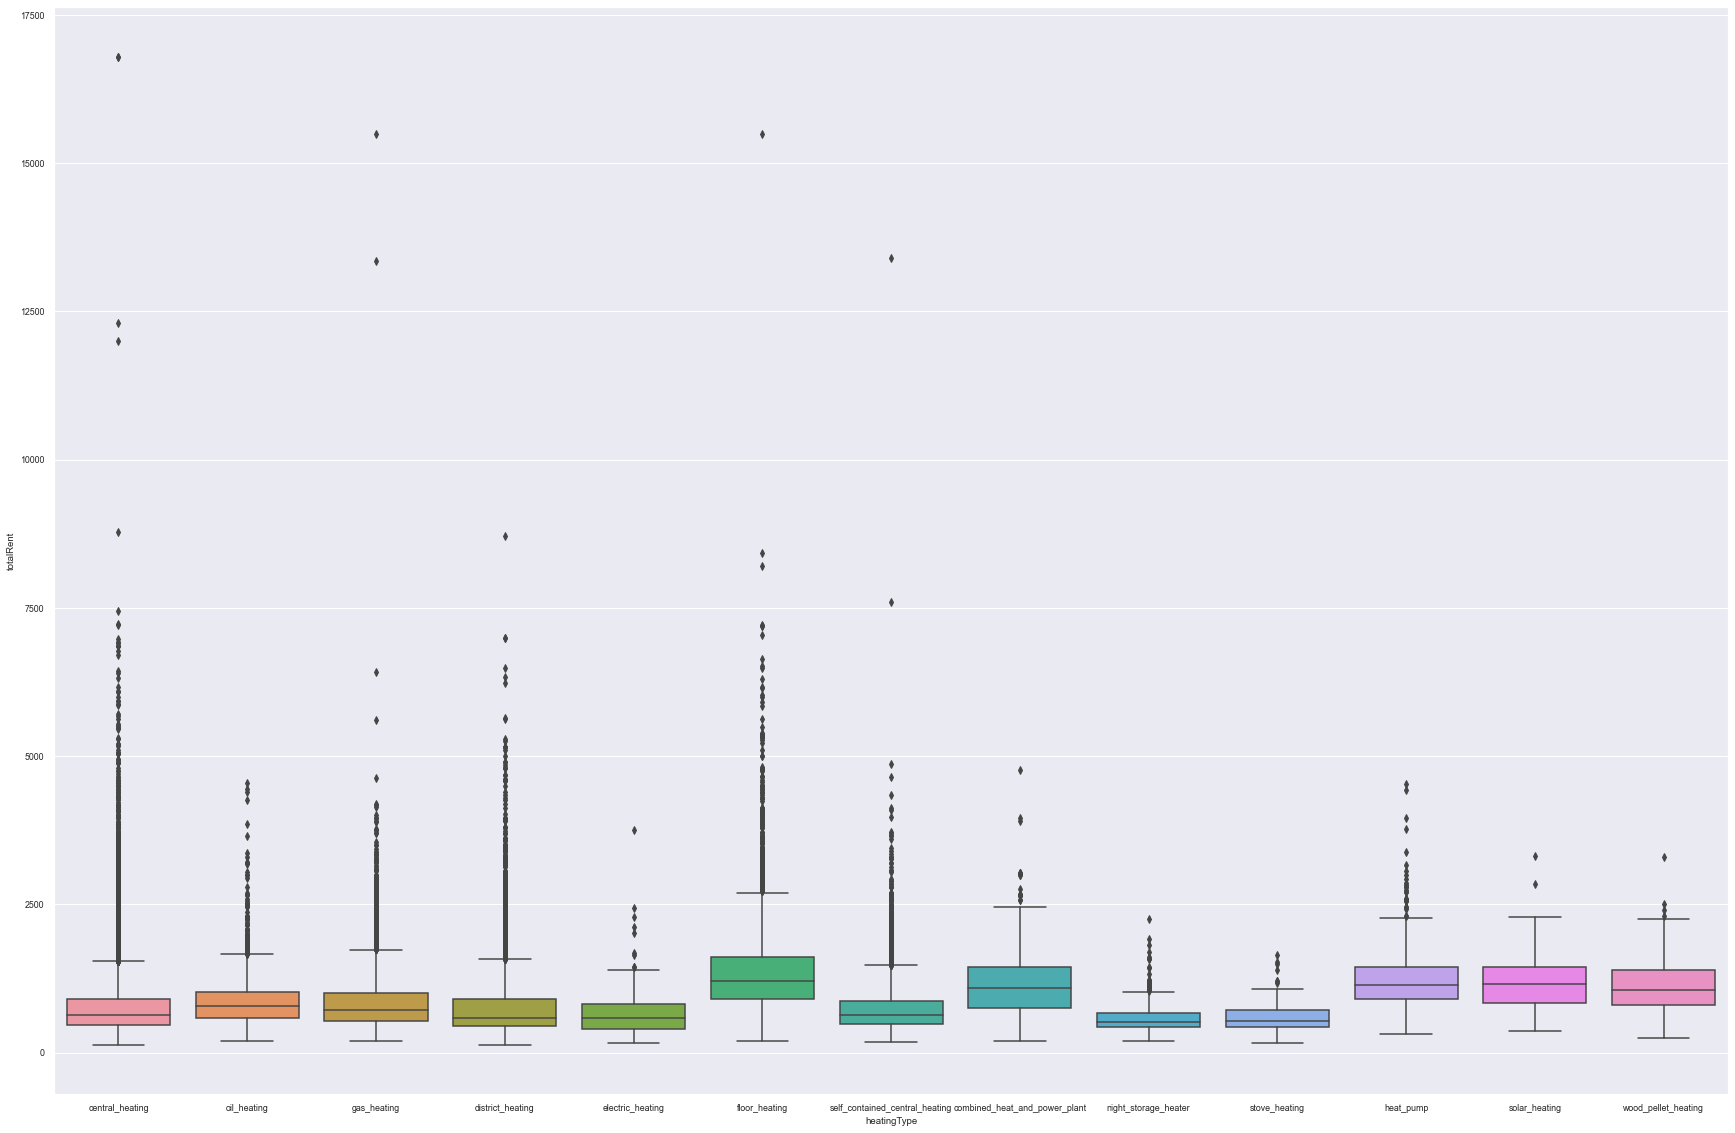

In [343]:
sns.set(font_scale=0.8)

fig, ax = plt.subplots(figsize=(30,20))
sns.boxplot(y="totalRent", x="heatingType", data=df_b)

plt.show()


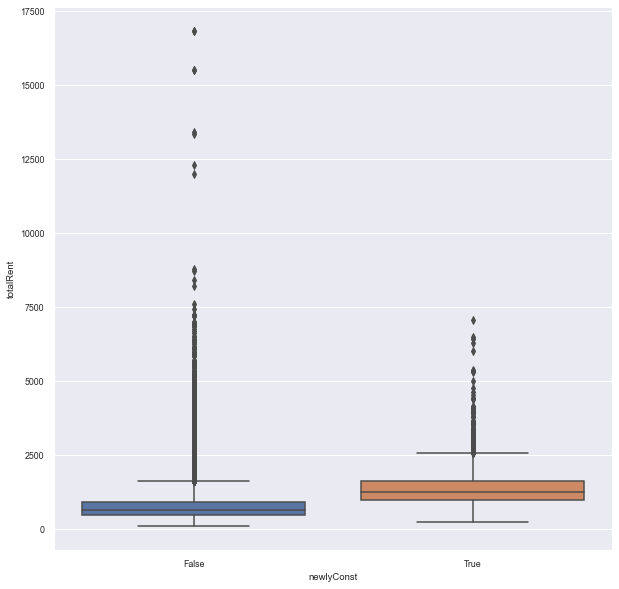

In [345]:
sns.set(font_scale=0.8)

fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y="totalRent", x="newlyConst", data=df_b)

plt.show()


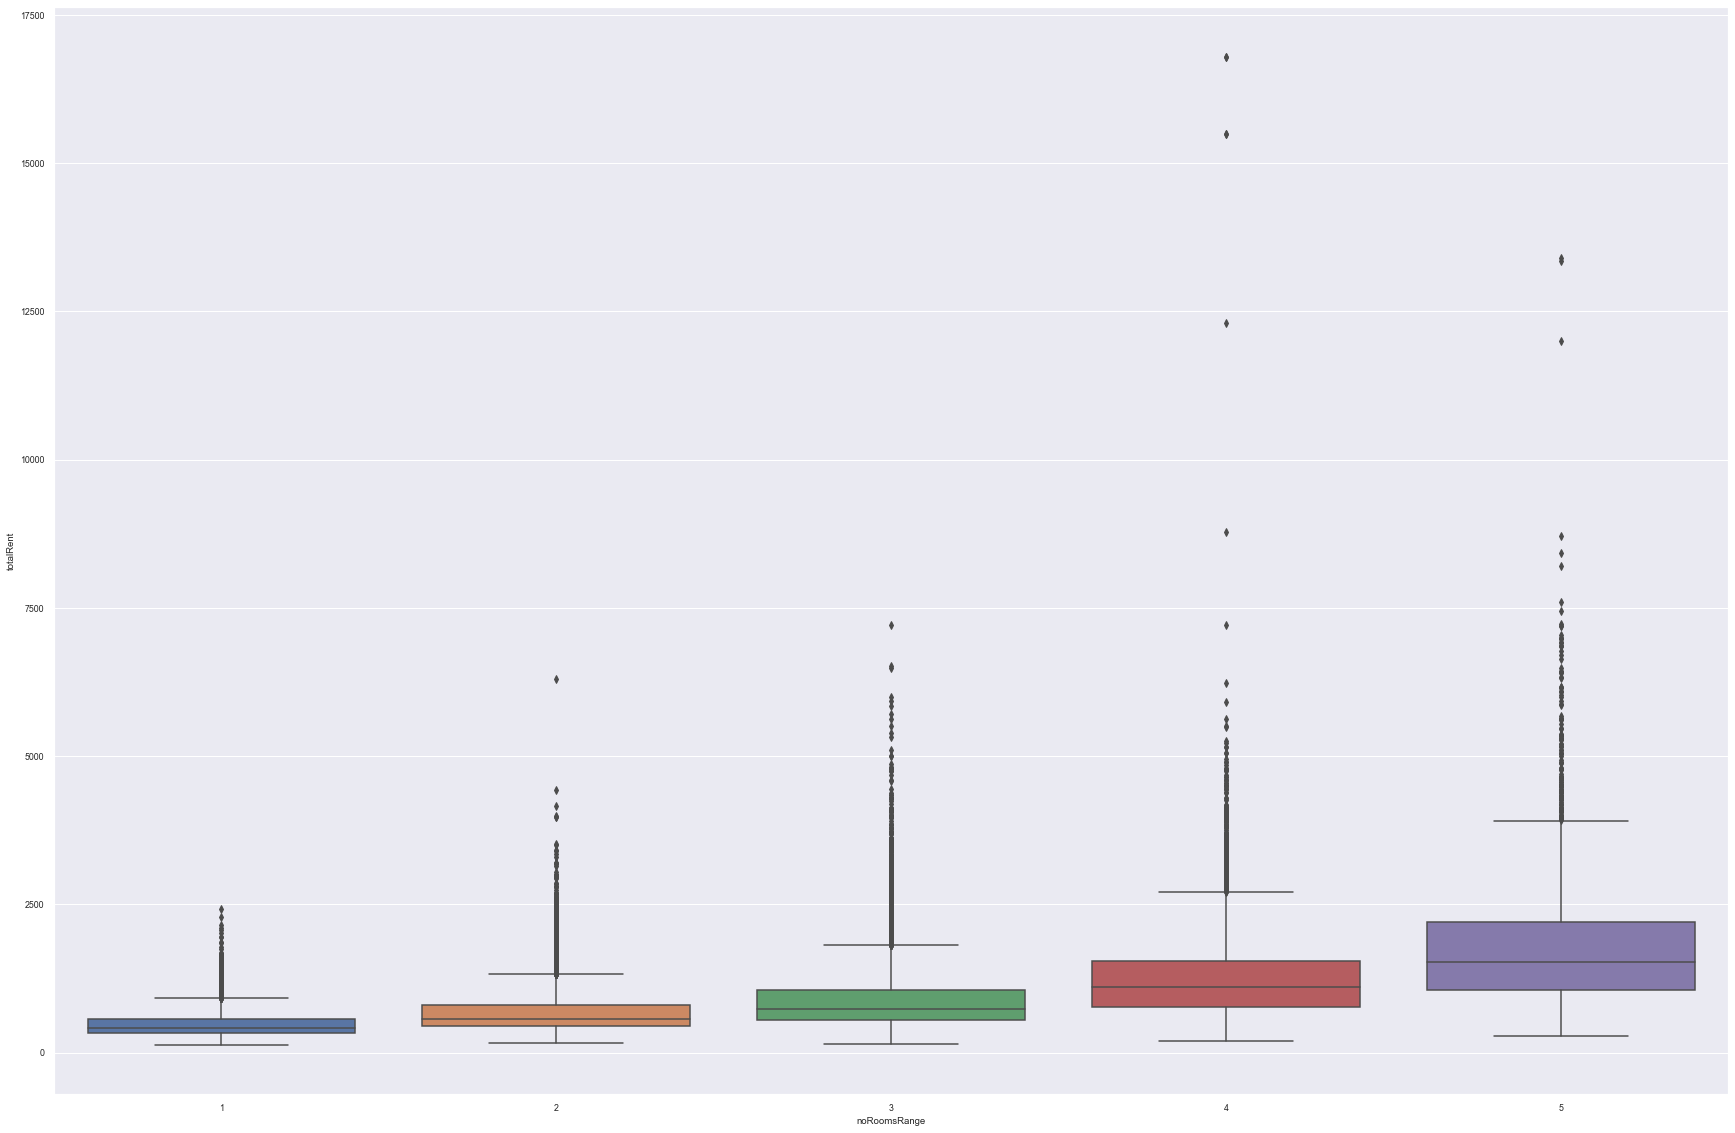

In [346]:
sns.set(font_scale=0.8)

fig, ax = plt.subplots(figsize=(30,20))
sns.boxplot(y="totalRent", x="noRoomsRange", data=df_b)

plt.show()


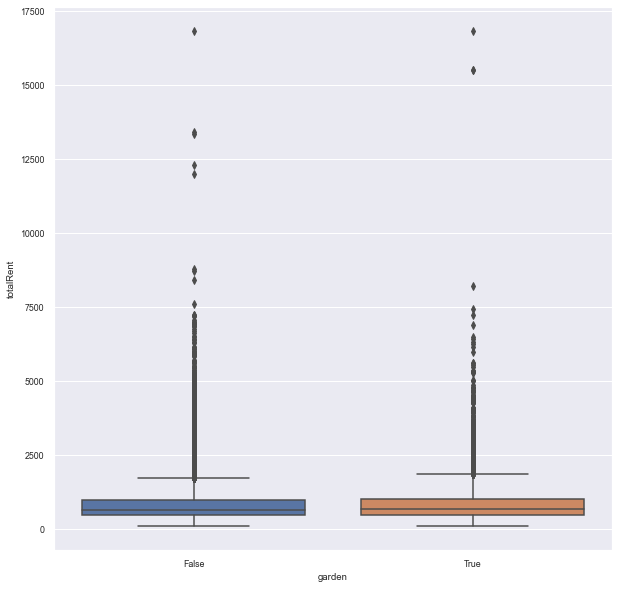

In [347]:
sns.set(font_scale=0.8)

fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y="totalRent", x="garden", data=df_b)

plt.show()


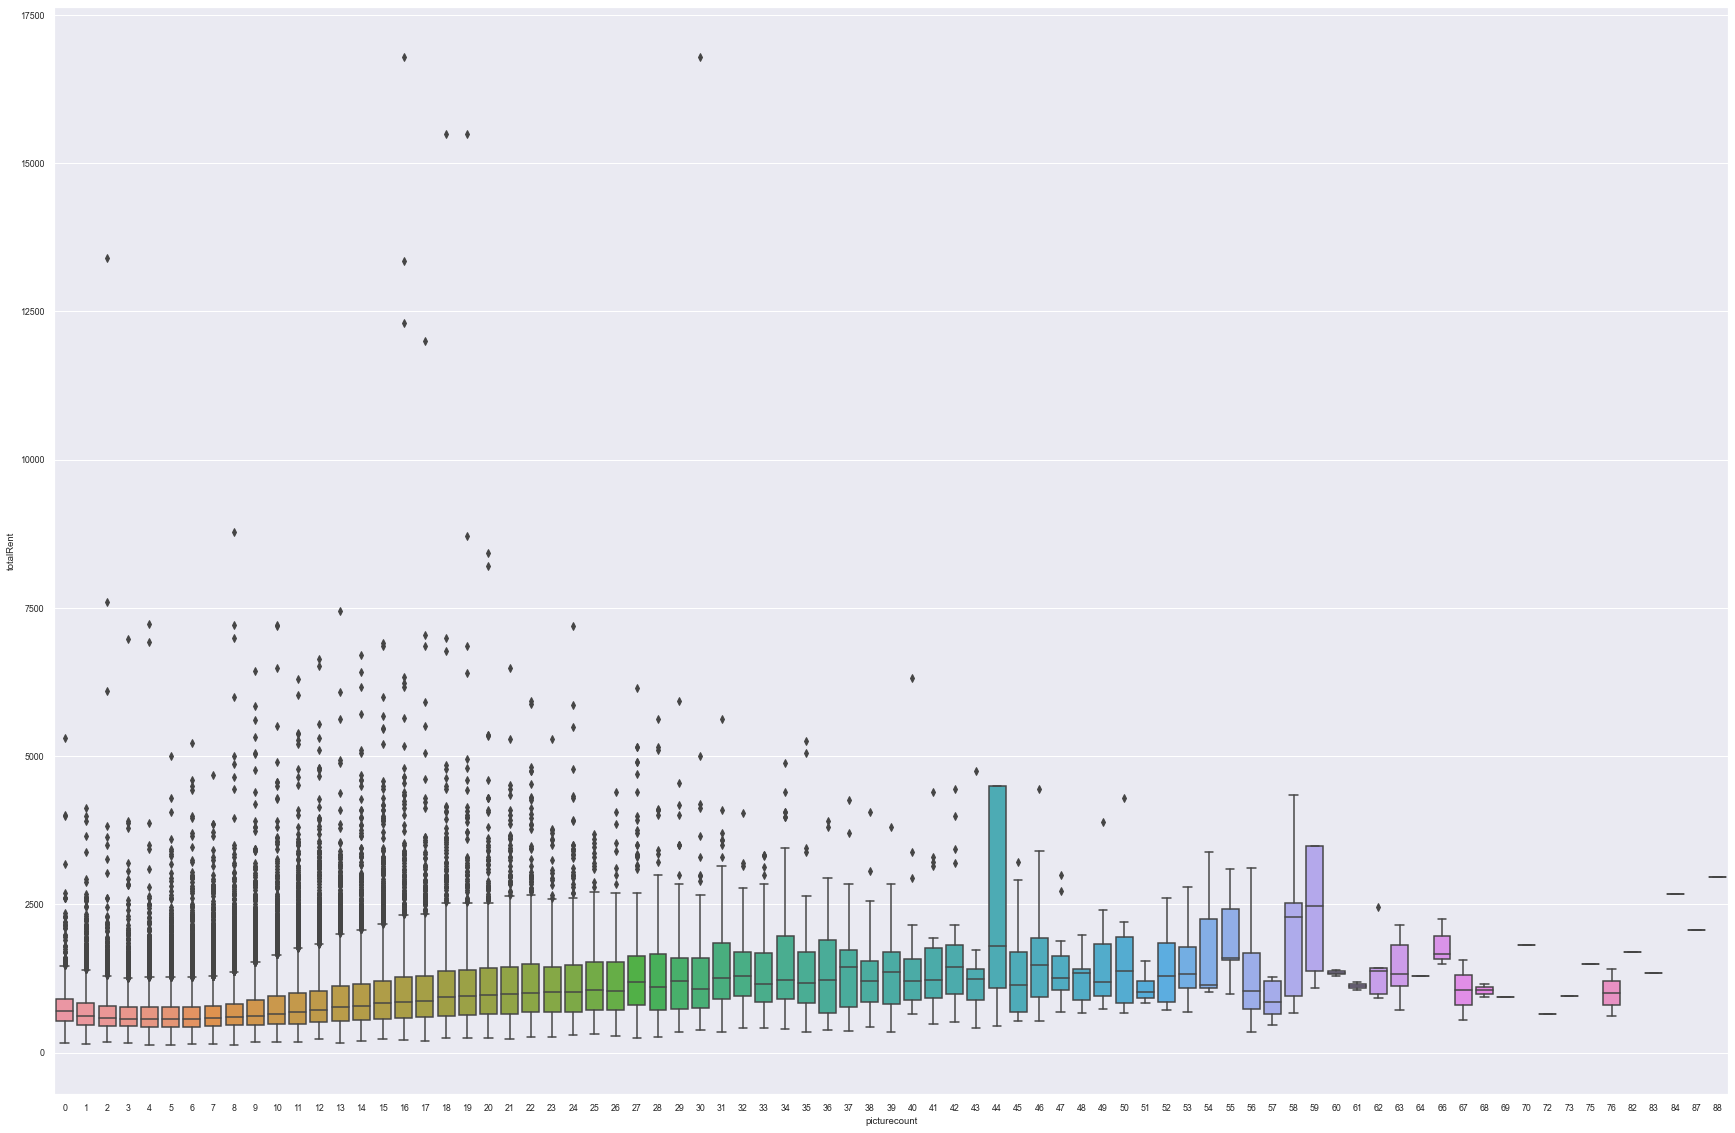

In [348]:
sns.set(font_scale=0.8)

fig, ax = plt.subplots(figsize=(30,20))
sns.boxplot(y="totalRent", x="picturecount", data=df_b)

plt.show()


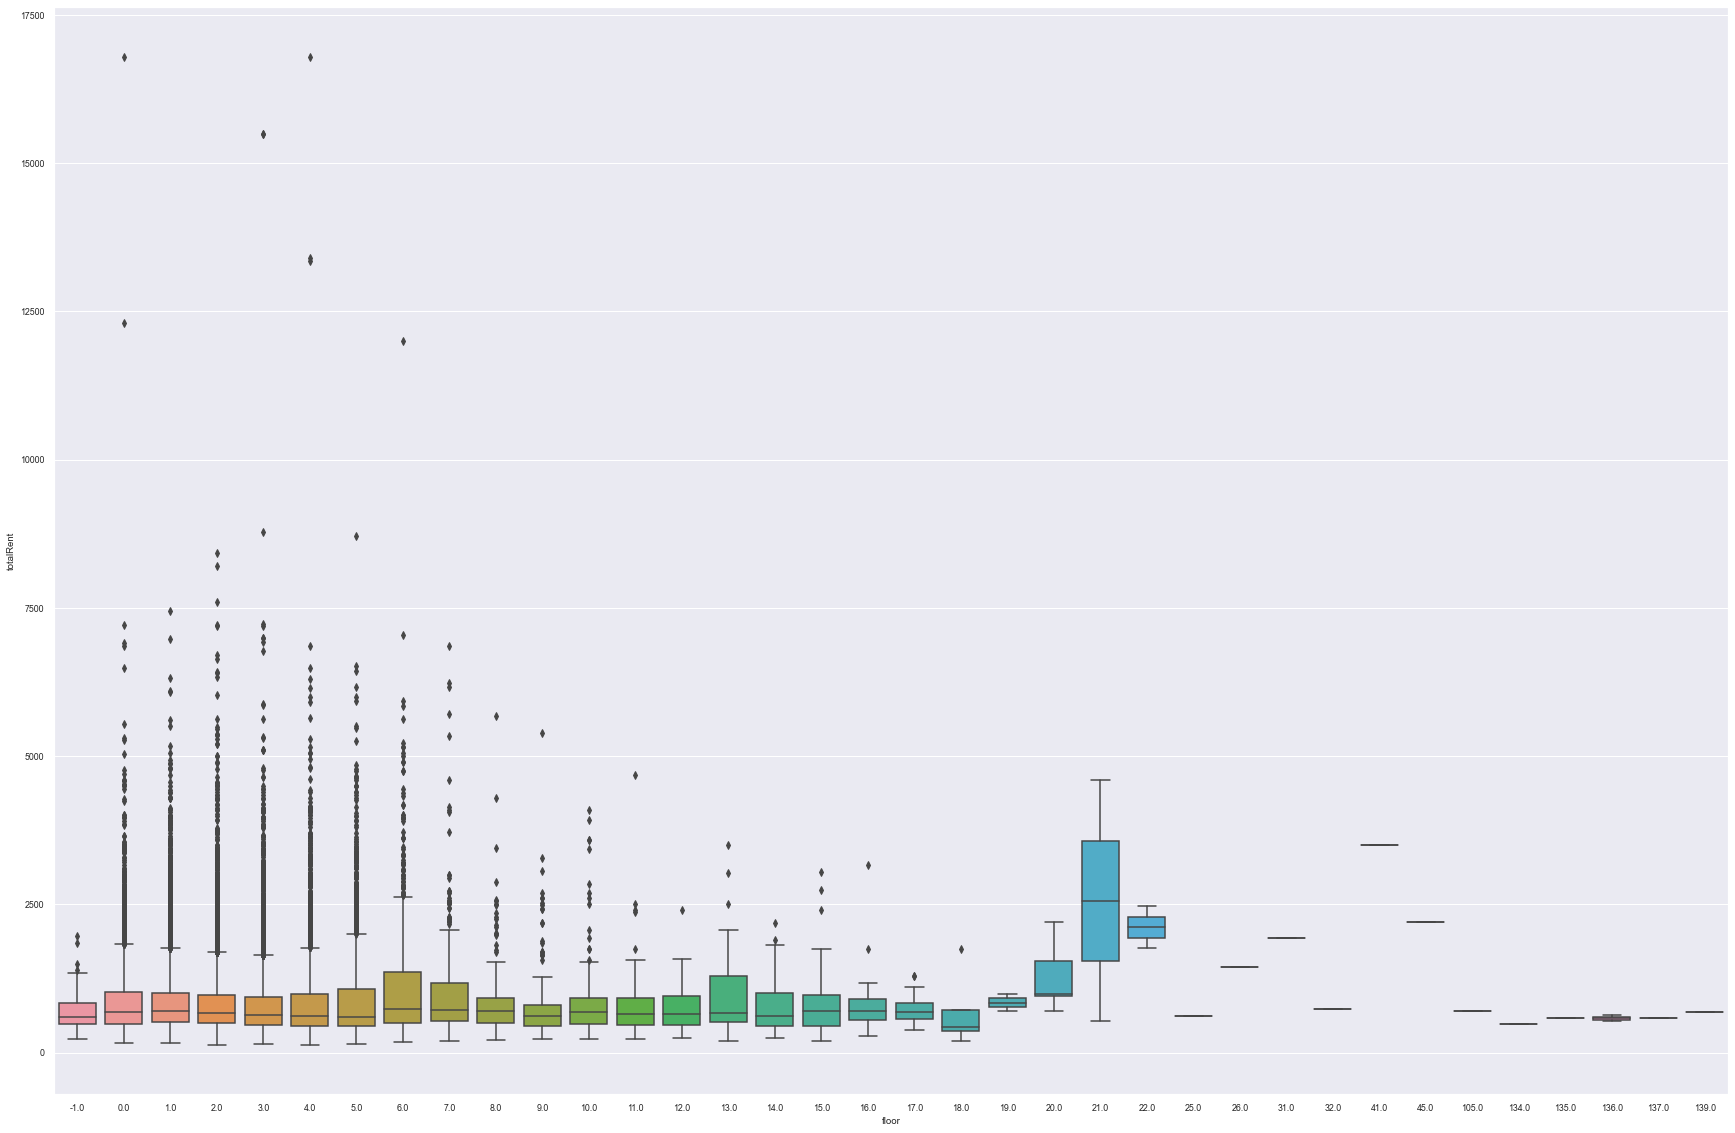

In [349]:
sns.set(font_scale=0.8)

fig, ax = plt.subplots(figsize=(30,20))
sns.boxplot(y="totalRent", x="floor", data=df_b)

plt.show()


#### Clustering

In [389]:
from sklearn.cluster import KMeans # KMeans model to find patterns in the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [402]:
df_b_cluster=df_b[['totalRent','geo_plz']] # data frame lowered to total rent and PLZ

In [403]:
scaler_x = StandardScaler() # using standard scale to fit the data
scaler_x.fit(df_b_cluster)
df_b_cluster = pd.DataFrame(scaler_x.transform(df_b_cluster), columns = df_b_cluster.columns)

In [407]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_b_cluster)

KMeans(n_clusters=6)

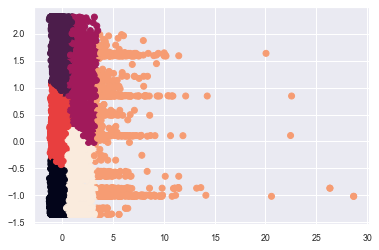

In [408]:
plt.scatter(df_b_cluster['totalRent'], df_b_cluster['geo_plz'], c=kmeans.labels_)
plt.show()

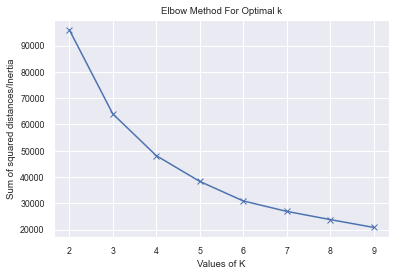

In [406]:
Sum_of_squared_distances = []
K = range(2,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_b_cluster)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k') # for finding the optimal number of clusters
plt.show()

In [421]:
#cluster 2

df_b_cluster=df_b[['totalRent','livingSpace', 'yearConstructed', 'serviceCharge']]
scaler_x = StandardScaler()
scaler_x.fit(df_b_cluster)
df_b_cluster = pd.DataFrame(scaler_x.transform(df_b_cluster), columns = df_b_cluster.columns)

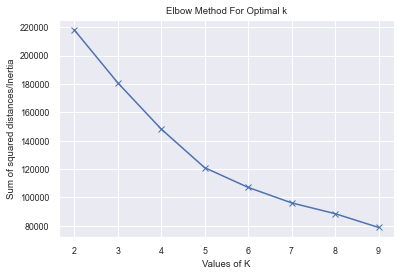

In [422]:
Sum_of_squared_distances = []
K = range(2,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_b_cluster)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [425]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_b_cluster)

KMeans(n_clusters=5)

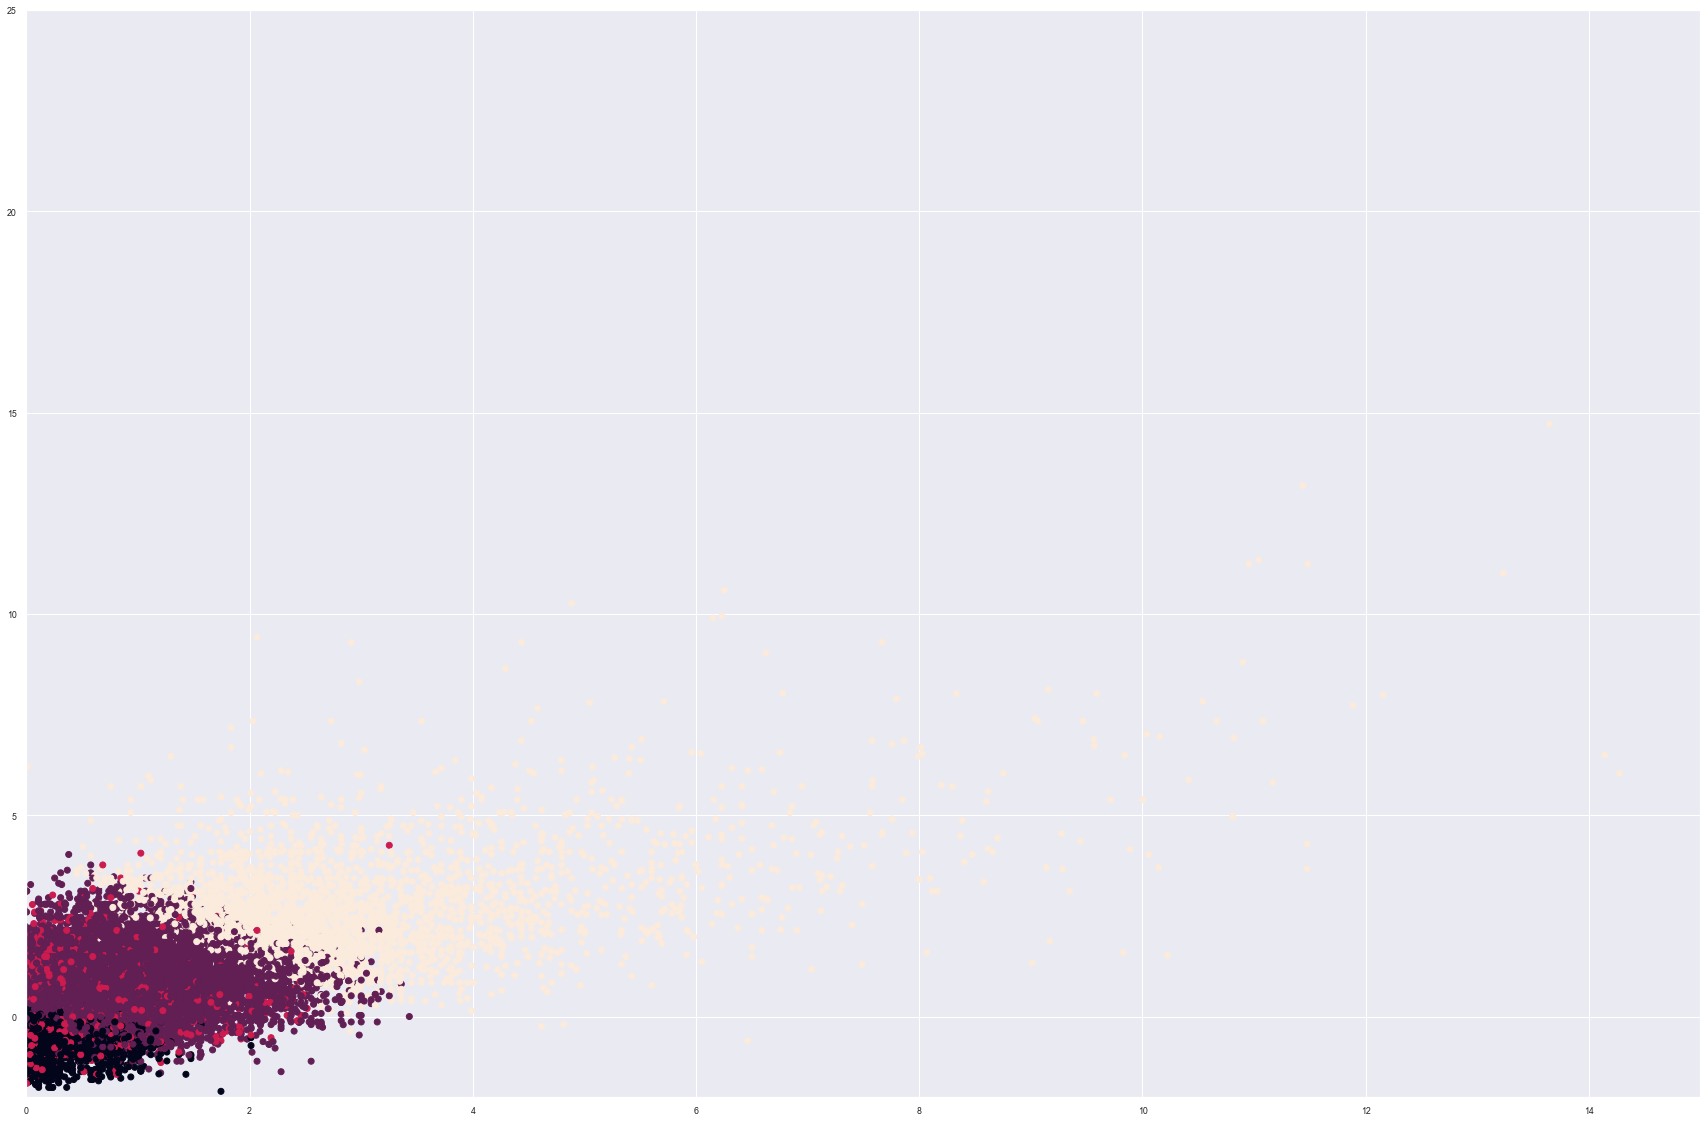

In [429]:
fig, ax = plt.subplots(figsize=(30,20))

plt.scatter(df_b_cluster['totalRent'], df_b_cluster['livingSpace'], c=kmeans.labels_)
plt.xlim([0, 15])
plt.ylim([-2,25])
plt.show()

In [350]:
df_b.columns

Index(['state', 'serviceCharge', 'heatingType', 'telekomTvOffer', 'newlyConst',
       'balcony', 'picturecount', 'pricetrend', 'telekomUploadSpeed',
       'totalRent', 'yearConstructed', 'scoutId', 'firingTypes', 'hasKitchen',
       'geo_bln', 'cellar', 'yearConstructedRange', 'baseRent', 'livingSpace',
       'geo_krs', 'street', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'floor', 'noRoomsRange', 'garden', 'livingSpaceRange',
       'district', 'town', 'description', 'facilities', 'date',
       'per_living_space'],
      dtype='object')

In [43]:
df_b

state  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
8         Baden_Württemberg         110.00                     oil_heating   
13      Nordrhein_Westfalen         200.00                 central_heating   
14      Nordrhein_Westfalen         215.00                     gas_heating   
15                Thüringen          80.00                district_heating   
...                     ...            ...                             ...   
268837  Nordrhein_Westfalen         180.00  self_contained_central_heating   
268840               Hessen         112.13                district_heating   
268841       Sachsen_Anhalt          98.00                 central_heating   
268843              Sachsen         120.00                 central_heating   
268847               Hessen         220.00                 central_heating   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
0       ONE_YEAR_FREE       False    False             6        4.62   
8       ONE_YEAR_FREE       False    False             5        3.77   
13      ONE_YEAR_FREE       False    False             3        3.45   
14      ONE_YEAR_FREE        True     True            12        3.76   
15      ONE_YEAR_FREE       False     True             5        1.67   
...               ...         ...      ...           ...         ...   
268837  ONE_YEAR_FREE       False    False             9        4.16   
268840  ONE_YEAR_FREE       False     True            14        6.90   
268841  ONE_YEAR_FREE       False     True             2        1.56   
268843  ONE_YEAR_FREE       False     True            12        2.00   
268847  ONE_YEAR_FREE       False     True            21        2.90   

        telekomUploadSpeed  totalRent  ...  floor  noRoomsRange garden  \
0                     10.0     840.00  ...    1.0             4   True   
8                     40.0     690.00  ...    2.0             2  False   
13                    40.0    1150.00  ...    4.0             4  False   
14                     2.4    1320.65  ...    0.0             3  False   
15                     2.4     300.00  ...    4.0             1  False   
...                    ...        ...  ...    ...           ...    ...   
268837                40.0     920.00  ...    4.0             3  False   
268840                 2.4    1479.64  ...    2.0             3   True   
268841                40.0     424.52  ...    2.0             2  False   
268843                40.0     368.00  ...    1.0             2   True   
268847                40.0     930.00  ...    1.0             4   True   

        livingSpaceRange                district                 town  \
0                      4                Dortmund              Schüren   
8                      2       Emmendingen_Kreis           Denzlingen   
13                     6                    Hamm                Mitte   
14                     4                Dortmund           Kirchhörde   
15                     1                  Weimar            Schöndorf   
...                  ...                     ...                  ...   
268837                 4       Neuss_Rhein_Kreis                Neuss   
268840                 4       Frankfurt_am_Main         Preungesheim   
268841                 2               Magdeburg               Cracau   
268843                 2                Chemnitz               Kappel   
268847                 4  Limburg_Weilburg_Kreis  Limburg_an_der_Lahn   

                                              description  \
0       Die ebenerdig zu erreichende Erdgeschosswohnun...   
8       Diese ansprechende, lichtdurchflutete DG-Wohnu...   
13      Die angebotene Wohnfläche befindet sich im dri...   
14      Der attraktive Neubau mit 10 Wohnungen liegt i...   
15      Schönes fünfgeschossiges Mehrfamilienhaus  in ...   
...                                                   ...   
268837  Die hier angebotene

In [44]:
df_b.corr()['totalRent'].sort_values(ascending=False)

totalRent               1.000000
baseRent                0.894787
baseRentRange           0.774055
livingSpaceRange        0.647767
per_living_space        0.618921
serviceCharge           0.543492
noRoomsRange            0.425653
noRooms                 0.398621
pricetrend              0.386918
yearConstructedRange    0.294939
lift                    0.293550
picturecount            0.281594
hasKitchen              0.266876
balcony                 0.240221
newlyConst              0.222888
geo_plz                 0.219199
yearConstructed         0.141049
livingSpace             0.096190
scoutId                 0.058086
floor                   0.021855
garden                  0.018773
cellar                  0.017275
telekomUploadSpeed      0.010824
Name: totalRent, dtype: float64

#### DBSCAN Algorithm - Idea: with the help of DBSCAN to find all the noise and outliers in the data

In [61]:
from sklearn.cluster import DBSCAN

In [63]:
dbscan=DBSCAN() #initiate the model without parameters

In [64]:
dbscan.fit(df_b[['totalRent', 'baseRentRange']])

DBSCAN()

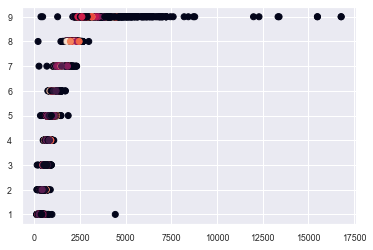

In [65]:
# visualize outputs
colors = dbscan.labels_
plt.scatter(df_b["totalRent"], df_b["baseRentRange"], c = colors)

In [69]:
# Value of epsilon and min points is needed.
from sklearn.neighbors import NearestNeighbors

In [70]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_b[['totalRent', 'baseRentRange']])
distances, indices = nbrs.kneighbors(df_b[['totalRent', 'baseRentRange']])

In [71]:
distances

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.02, 0.07, 0.1 , 0.29],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])

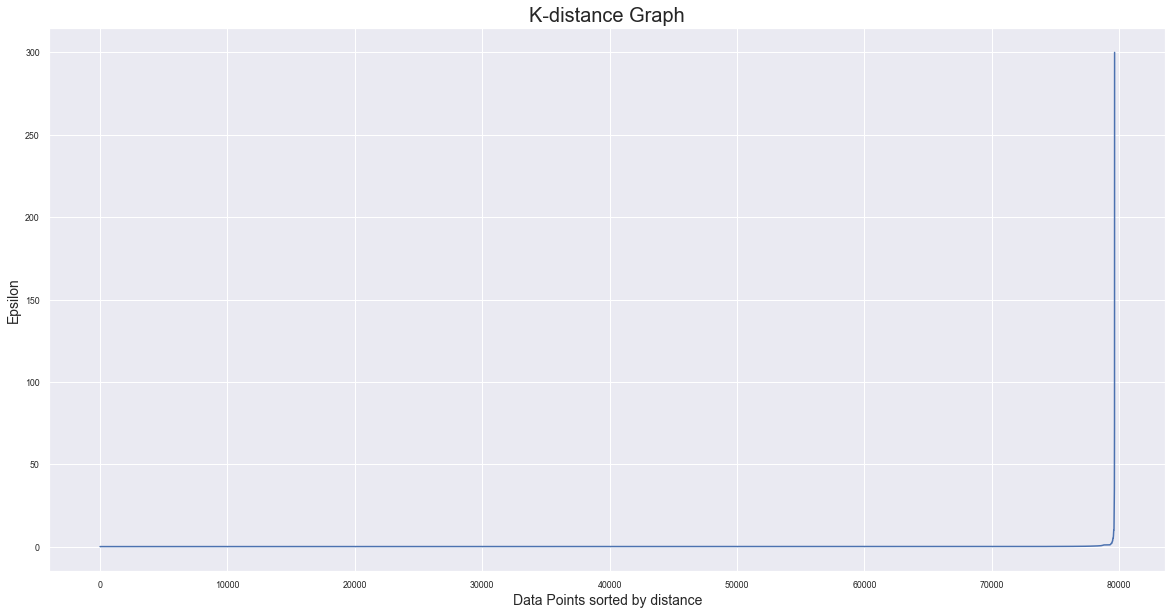

In [72]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [73]:
# For Epsilon value of 300 is choosen

In [ ]:
#For minPoints value of 30 is taken

In [76]:
# input data
data_dbscan = df_b[['totalRent', 'baseRentRange']]# specify & fit model
model = DBSCAN(eps = 300, min_samples = 30).fit(data_dbscan)

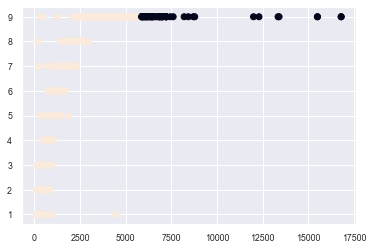

In [77]:
# ploting
colors = model.labels_
plt.scatter(data_dbscan["totalRent"], data_dbscan["baseRentRange"], c = colors)
# dark colored are the outliers

In [79]:
# table containing the outliers

outliers = data_dbscan[model.labels_ == -1]
outliers

totalRent  baseRentRange
6693      7600.00              9
9055      8706.00              9
9482      6035.00              9
14123    13400.00              9
37769     5876.35              9
38789     7200.00              9
43131     6480.00              9
50352     5936.40              9
55382     6420.00              9
60884     6090.00              9
61074     7000.00              9
61094    15500.00              9
66682     6630.00              9
69416     6158.54              9
69711     7200.00              9
81769     6524.00              9
84547     6850.00              9
96351    12000.00              9
103569    8430.00              9
104969    6430.00              9
108713    6930.00              9
113977    7220.00              9
118653   13344.00              9
119135    8200.00              9
120595    7220.00              9
121464    7050.00              9
125150    6170.00              9
131735    6900.00              9
135363    6302.50              9
141720    6157.00              9
145671    6000.00              9
150065    5849.00              9
157460    6400.00              9
159865    6240.00              9
164826    6102.00              9
173151    5920.00              9
179217    6850.00              9
179743    6770.00              9
187090    6485.00              9
204167    5930.00              9
214772    8780.00              9
215352    5995.00              9
218431    7450.00              9
220689    6700.00              9
223703   12300.00              9
225368    6979.50              9
225772   16800.00              9
228981   16800.00              9
241809   15500.00              9
243337    6336.06              9
243779    6855.24              9
253142    6310.03              9
255834    7224.00              9
264307    7000.00              9
267721    5862.00              9

In [84]:
df_b.loc[6693]

state                                                              Hessen
serviceCharge                                                         650
heatingType                                self_contained_central_heating
telekomTvOffer                                              ONE_YEAR_FREE
newlyConst                                                          False
balcony                                                              True
picturecount                                                            2
pricetrend                                                           4.86
telekomUploadSpeed                                                     10
totalRent                                                            7600
yearConstructed                                                      1900
scoutId                                                          89886750
firingTypes                                                           gas
hasKitchen                            

In [86]:
outliers.index

Int64Index([  6693,   9055,   9482,  14123,  37769,  38789,  43131,  50352,
             55382,  60884,  61074,  61094,  66682,  69416,  69711,  81769,
             84547,  96351, 103569, 104969, 108713, 113977, 118653, 119135,
            120595, 121464, 125150, 131735, 135363, 141720, 145671, 150065,
            157460, 159865, 164826, 173151, 179217, 179743, 187090, 204167,
            214772, 215352, 218431, 220689, 223703, 225368, 225772, 228981,
            241809, 243337, 243779, 253142, 255834, 264307, 267721],
           dtype='int64')

In [88]:
df_b.drop(outliers.index) #droping these outliers

state  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
8         Baden_Württemberg         110.00                     oil_heating   
13      Nordrhein_Westfalen         200.00                 central_heating   
14      Nordrhein_Westfalen         215.00                     gas_heating   
15                Thüringen          80.00                district_heating   
...                     ...            ...                             ...   
268837  Nordrhein_Westfalen         180.00  self_contained_central_heating   
268840               Hessen         112.13                district_heating   
268841       Sachsen_Anhalt          98.00                 central_heating   
268843              Sachsen         120.00                 central_heating   
268847               Hessen         220.00                 central_heating   

       telekomTvOffer  newlyConst  balcony  picturecount  pricetrend  \
0       ONE_YEAR_FREE       False    False             6        4.62   
8       ONE_YEAR_FREE       False    False             5        3.77   
13      ONE_YEAR_FREE       False    False             3        3.45   
14      ONE_YEAR_FREE        True     True            12        3.76   
15      ONE_YEAR_FREE       False     True             5        1.67   
...               ...         ...      ...           ...         ...   
268837  ONE_YEAR_FREE       False    False             9        4.16   
268840  ONE_YEAR_FREE       False     True            14        6.90   
268841  ONE_YEAR_FREE       False     True             2        1.56   
268843  ONE_YEAR_FREE       False     True            12        2.00   
268847  ONE_YEAR_FREE       False     True            21        2.90   

        telekomUploadSpeed  totalRent  ...  floor  noRoomsRange garden  \
0                     10.0     840.00  ...    1.0             4   True   
8                     40.0     690.00  ...    2.0             2  False   
13                    40.0    1150.00  ...    4.0             4  False   
14                     2.4    1320.65  ...    0.0             3  False   
15                     2.4     300.00  ...    4.0             1  False   
...                    ...        ...  ...    ...           ...    ...   
268837                40.0     920.00  ...    4.0             3  False   
268840                 2.4    1479.64  ...    2.0             3   True   
268841                40.0     424.52  ...    2.0             2  False   
268843                40.0     368.00  ...    1.0             2   True   
268847                40.0     930.00  ...    1.0             4   True   

        livingSpaceRange                district                 town  \
0                      4                Dortmund              Schüren   
8                      2       Emmendingen_Kreis           Denzlingen   
13                     6                    Hamm                Mitte   
14                     4                Dortmund           Kirchhörde   
15                     1                  Weimar            Schöndorf   
...                  ...                     ...                  ...   
268837                 4       Neuss_Rhein_Kreis                Neuss   
268840                 4       Frankfurt_am_Main         Preungesheim   
268841                 2               Magdeburg               Cracau   
268843                 2                Chemnitz               Kappel   
268847                 4  Limburg_Weilburg_Kreis  Limburg_an_der_Lahn   

                                              description  \
0       Die ebenerdig zu erreichende Erdgeschosswohnun...   
8       Diese ansprechende, lichtdurchflutete DG-Wohnu...   
13      Die angebotene Wohnfläche befindet sich im dri...   
14      Der attraktive Neubau mit 10 Wohnungen liegt i...   
15      Schönes fünfgeschossiges Mehrfamilienhaus  in ...   
...                                                   ...   
268837  Die hier angebotene

## ML Models

#### Random Forest

In [89]:
# Defining features and target

In [302]:
from sklearn.preprocessing import StandardScaler #import standard scaler

In [303]:
features=df_b[['noRoomsRange','noRooms','pricetrend','yearConstructedRange','lift','balcony','newlyConst','geo_plz','baseRent']]

In [304]:
X=features

In [305]:
targets=df_b[['totalRent']]
Y=targets

In [306]:
Y

totalRent
0          840.00
8          690.00
13        1150.00
14        1320.65
15         300.00
...           ...
268837     920.00
268840    1479.64
268841     424.52
268843     368.00
268847     930.00

[79649 rows x 1 columns]

In [307]:
# Split the Data in Training and Test Set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [308]:
# Scale the Data with Standard Scaler
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
Y_train_scaled = scaler_y.fit_transform(Y_train)
Y_test_scaled = scaler_y.transform(Y_test)

In [309]:
df_test=pd.DataFrame()
df_test['REAL']=Y_test_scaled.flatten()

In [310]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [311]:
# Model

rf = RandomForestRegressor(n_estimators = 450 ,max_features='sqrt')

In [312]:
# Fit
rf.fit(X_train_scaled, Y_train_scaled)

<ipython-input-312-963e1c4d1282>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled, Y_train_scaled)


RandomForestRegressor(max_features='sqrt', n_estimators=450)

In [313]:
# Predict
df_test["RF_Pred"] = rf.predict(X_test_scaled)
print(df_test.head(2))


       REAL   RF_Pred
0  0.851976  0.932577
1  1.087476  1.127917


In [314]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Performance Measures FUNCTION

def loss_functions(y_true, y_pred):
    print("Loss functions:")
    print("* R-squared =", r2_score(y_true, y_pred))
    print("* RMSE =", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("* MAE =", mean_absolute_error(y_true, y_pred))
    print("* MSE =", mean_squared_error(y_true, y_pred))

In [315]:
# ASSESMENT

loss_functions(Y_test_scaled,df_test['RF_Pred'])

Loss functions:
* R-squared = 0.9714378009667992
* RMSE = 0.17284764203491462
* MAE = 0.07145287300535974
* MSE = 0.029876307357029987


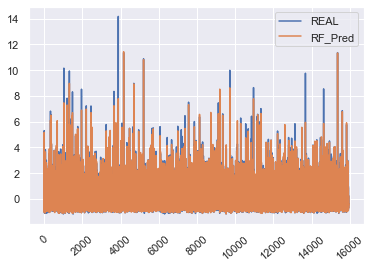

In [111]:
sns.set(font_scale=1)
df_test[["REAL", "RF_Pred"]].plot()
plt.xticks(rotation = 40)
plt.show()

#### Light Gradient Boost

In [113]:
import lightgbm as lgb

In [316]:
d_train = lgb.Dataset(X_train_scaled, label=Y_train_scaled) # Load the dataset and test

# parameters for this model
params = {
    'n_estimators': 10000,
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'max_depth': -1,
    'learning_rate': 0.001,
    'subsample': 0.72,
    'subsample_freq': 3,
    'feature_fraction': 0.9,
    'lambda_l1': 1,
    'lambda_l2': 1,
    'seed': 46,
}

clf = lgb.train(params, d_train, 100)

C:\Users\bkari\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\bkari\Anaconda3\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 63719, number of used features: 9
[LightGBM] [Info] Start training from score 0.000000


In [317]:
y_pred = clf.predict(X_test_scaled)
y_pred

array([ 0.88158746,  1.18732871,  0.15014898, ..., -0.5932765 ,
       -0.76832086, -0.60787419])

In [318]:
# Predict
df_test["LGB_Pred"] = clf.predict(X_test_scaled)
print(df_test.head(2))

       REAL   RF_Pred  LGB_Pred
0  0.851976  0.932577  0.881587
1  1.087476  1.127917  1.187329


In [319]:
loss_functions(Y_test_scaled,y_pred)

Loss functions:
* R-squared = 0.9495871373434224
* RMSE = 0.22963512491747443
* MAE = 0.07355006549921586
* MSE = 0.05273229059586409


In [320]:
loss_functions(Y_test_scaled,df_test["LGB_Pred"])

Loss functions:
* R-squared = 0.9495871373434224
* RMSE = 0.22963512491747443
* MAE = 0.07355006549921586
* MSE = 0.05273229059586409


#### PCA and Random Forest
The idea is that when we shrink the dataset with PCA we gain simplicity and time (ML models run faster) on the cost of performance metrics.
If the trade-off is not big one could argue that doing PCA transformation helps the ML model

In [68]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [321]:
PCA_n_number=3

In [322]:
# Input Feutures PCA
RANDOM_STATE=42
pca1 = PCA(n_components=PCA_n_number, random_state = RANDOM_STATE)
X_temp = pca1.fit_transform(X_train_scaled)
print(pca1.explained_variance_)

[2.74698998 1.83038538 1.1105111 ]


In [323]:
# PCA
n_components = PCA_n_number #

DR = 'PCA'
Cluster = 'None'
pca = PCA(n_components=n_components, random_state = RANDOM_STATE)

X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

X_train_PCA = pd.DataFrame(X_train_PCA)
X_test_PCA = pd.DataFrame(X_test_PCA)
print(pca.explained_variance_)


[2.74698998 1.83038538 1.1105111 ]


In [324]:
scaler_x2 = StandardScaler()
X_train_PCA_scaled = scaler_x2.fit_transform(X_train_PCA)
X_test_PCA_scaled = scaler_x2.transform(X_test_PCA)

In [325]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(Y_train_scaled.reshape(-1, 1))
y_test_scaled = scaler_y.transform(Y_test_scaled.reshape(-1, 1))

In [326]:
# Model
rf = RandomForestRegressor(n_estimators = 250 ,max_features='sqrt')

In [327]:
# Fit
rf.fit(X_train_PCA_scaled, y_train_scaled)

<ipython-input-327-3ed6d98d79e3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_PCA_scaled, y_train_scaled)


RandomForestRegressor(max_features='sqrt', n_estimators=250)

In [328]:
# Predict
y_pred_rf_pca=rf.predict(X_test_PCA_scaled)


In [329]:
loss_functions(y_test_scaled,y_pred_rf_pca)

Loss functions:
* R-squared = 0.8885258710790872
* RMSE = 0.3414716730760897
* MAE = 0.18305782594426062
* MSE = 0.1166029035133839


In [330]:
df_test['RF_PCA']=y_pred_rf_pca

In [331]:
from sklearn.neighbors import KNeighborsRegressor

In [332]:
# Model
knn = KNeighborsRegressor(n_neighbors = 8,p = 1)

In [333]:
# Fit
knn.fit(X_train_scaled, Y_train_scaled)

KNeighborsRegressor(n_neighbors=8, p=1)

In [334]:
# Predict
y_pred_knn=knn.predict(X_test_scaled)

In [335]:
df_test['KNN']=knn.predict(X_test_scaled)

In [336]:
loss_functions(y_test_scaled,y_pred_knn)

Loss functions:
* R-squared = 0.9385530845049892
* RMSE = 0.2535231850346115
* MAE = 0.1098238516423161
* MSE = 0.06427400535009387


In [337]:
#Now we do it with PCA
knn.fit(X_train_PCA_scaled, y_train_scaled)

KNeighborsRegressor(n_neighbors=8, p=1)

In [338]:
# Predict
y_pred_knn_pca=knn.predict(X_test_PCA_scaled)

In [339]:
df_test['KNN_PCA']=knn.predict(X_test_PCA_scaled)

In [340]:
loss_functions(y_test_scaled,y_pred_knn_pca)

Loss functions:
* R-squared = 0.8699471185254267
* RMSE = 0.3688311801613357
* MAE = 0.1832409956239457
* MSE = 0.13603643945920366


### SVR

In [341]:
from sklearn.svm import SVR

# Models
svr_rbf = SVR(kernel = 'rbf', gamma='scale', epsilon=0.39 , C=6)#, gamma=0.039)

# Fit
svr_rbf.fit(X_train_scaled, Y_train_scaled)


C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=6, epsilon=0.39)

In [342]:

# Predict
y_pred_svr=svr_rbf.predict(X_test_scaled)



# Loss
loss_functions(y_true = Y_test_scaled, y_pred = y_pred_svr)

Loss functions:
* R-squared = 0.9324237634574735
* RMSE = 0.26586712509638155
* MAE = 0.11044346040366228
* MSE = 0.070685328207015


In [343]:
df_test['SVR_rbf']=svr_rbf.predict(X_test_scaled)

In [344]:
#now with PCA

# Models
svr_rbf = SVR(kernel = 'rbf', gamma='scale', epsilon=0.39 , C=6)#, gamma=0.039)
svr_rbf.fit(X_train_PCA_scaled, y_train_scaled)



C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=6, epsilon=0.39)

In [345]:
# Predict
y_pred_PCA_svr=svr_rbf.predict(X_test_PCA_scaled)

In [346]:
df_test['SVR_rbf_PCA']=svr_rbf.predict(X_test_PCA_scaled)

In [347]:
# Loss
loss_functions(y_true = y_test_scaled, y_pred = y_pred_PCA_svr)

Loss functions:
* R-squared = 0.8055320735952696
* RMSE = 0.45101566922194697
* MAE = 0.2847747288018393
* MSE = 0.2034151338837207


### Ensemble Method
This ensemble model will be just trained with PCA since computation power of our laptop is not enough.

In [348]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [349]:
DTR=DecisionTreeRegressor(max_depth=250)
#rf = RandomForestRegressor(n_estimators = 70 ,random_state = 42, max_features='sqrt')
model_ABR = AdaBoostRegressor(n_estimators=250, base_estimator=DTR ,learning_rate=0.0001)
model_ABR.fit(X_train_PCA_scaled,y_train_scaled)

C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=250),
                  learning_rate=0.0001, n_estimators=250)

In [350]:
y_pred_PCA_abr=model_ABR.predict(X_test_PCA_scaled)

In [351]:
df_test['AdaBoost_PCA']=model_ABR.predict(X_test_PCA_scaled)

In [352]:
loss_functions(y_test_scaled, y_pred_PCA_abr)

Loss functions:
* R-squared = 0.8995550469519566
* RMSE = 0.32413930663734325
* MAE = 0.16726835344461385
* MSE = 0.10506629010733765


### Gradient Boosting
This ensemble model will be just trained with PCA since computation power of our laptop is not enough.

In [353]:
from sklearn.ensemble import GradientBoostingRegressor

In [354]:
gbr=GradientBoostingRegressor(max_depth=50,n_estimators=250,learning_rate=0.01,max_features='sqrt')
gbr.fit(X_train_PCA_scaled,y_train_scaled)

C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.01, max_depth=50, max_features='sqrt',
                          n_estimators=250)

In [355]:
y_pred_PCA_gba=gbr.predict(X_test_PCA_scaled)

In [356]:
df_test['GradientBoost_PCA']=gbr.predict(X_test_PCA_scaled)

In [357]:
loss_functions(y_test_scaled, y_pred_PCA_gba)

Loss functions:
* R-squared = 0.8835794581075275
* RMSE = 0.3489654628847103
* MAE = 0.1941393545458955
* MSE = 0.12177689428634011


### Ensemble Average Method
This ensemble model will be just trained with PCA since computation power of our laptop is not enough.
In order that stacking really comes to shine it is important to:
1. Choose Models that are going to be in the stacking with the goal that each of them are different in their basis (make different types of errors)
2. 4-fold dataset split

In [163]:
# importing stacking lib
!pip install vecstack
# importing stacking lib
from vecstack import stacking

In [358]:
from sklearn.linear_model import LinearRegression

In [359]:
gbr=GradientBoostingRegressor(max_depth=50,n_estimators=250,learning_rate=0.01,max_features='sqrt')
model_ABR = AdaBoostRegressor(n_estimators=250, base_estimator=DTR ,learning_rate=0.0001)
svr_rbf = SVR(kernel = 'rbf', gamma='scale', epsilon=0.39 , C=6)#, gamma=0.039)
#clf = lgb.train(params, d_train, 100)



In [360]:
model1=gbr
model2=model_ABR
model3=svr_rbf
#model4=clf

In [361]:
# putting all base model objects in one list
all_models = [model1, model2, model3]

# computing the stack features
s_train, s_test = stacking(all_models, X_train=X_train_PCA_scaled, X_test=X_test_PCA_scaled,y_train=y_train_scaled, regression=True, n_folds=10)

C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [362]:
#second level model
final_model=lin_reg=LinearRegression() #KNeighborsRegressor(n_neighbors = 21,p = 1) #both Linear Reg and KNN lead to same results!a

In [363]:
# initializing the second-level model
#final_model = model_3

# fitting the second level model with stack features
final_model = final_model.fit(s_train, y_train_scaled)

# predicting the final output using stacking
pred_final = final_model.predict(s_test)

In [364]:
df_test['Stacking_Ensemble'] = final_model.predict(s_test)

In [365]:
loss_functions(y_test_scaled, pred_final)

Loss functions:
* R-squared = 0.8984804855732874
* RMSE = 0.3258685173629733
* MAE = 0.1752440792577746
* MSE = 0.10619029060834241


## Dataframe containing all of the predictions from all of the models

In [366]:
df_test

REAL   RF_Pred  LGB_Pred    RF_PCA       KNN   KNN_PCA   SVR_rbf  \
0      0.851976  0.932577  0.881587  1.003823  0.763599  0.991757  0.927018   
1      1.087476  1.127917  1.187329  0.480139  1.169543  0.381682  1.225316   
2      0.108884  0.133411  0.150149  0.075701  0.252227  0.102544 -0.115670   
3     -0.549439 -0.515647 -0.496289 -0.498918 -0.540240 -0.553170 -0.536347   
4     -0.639620 -0.617618 -0.608736 -0.579454 -0.612899 -0.607761 -0.541072   
...         ...       ...       ...       ...       ...       ...       ...   
15925  0.295378  0.228963  0.272804  0.065175  0.223378  0.000689  0.228508   
15926 -0.670281 -0.549608 -0.570640 -0.437648 -0.506490 -0.525604 -0.538256   
15927 -0.669993 -0.590701 -0.593276 -0.539323 -0.606929 -0.559582 -0.537731   
15928 -0.729801 -0.776215 -0.768321 -0.915099 -0.892975 -0.930454 -0.632543   
15929 -0.612565 -0.610204 -0.607874 -0.605766 -0.550872 -0.625303 -0.604025   

       SVR_rbf_PCA  AdaBoost_PCA  GradientBoost_PCA  Stacking_Ensemble  
0         0.733298      0.938550           0.919720           0.936139  
1         0.818809      0.722116           0.398536           0.599505  
2        -0.236594      0.108884           0.100058           0.051906  
3        -0.300297     -0.468276          -0.430269          -0.457676  
4        -0.428121     -0.630602          -0.542665          -0.591563  
...            ...           ...                ...                ...  
15925     0.103788      0.177602          -0.024885           0.088907  
15926    -0.173467     -0.576493          -0.490502          -0.524689  
15927    -0.336357     -0.686604          -0.522923          -0.600529  
15928    -0.886387     -0.937217          -0.823277          -0.913147  
15929    -0.458641     -0.598136          -0.550145          -0.595437  

[15930 rows x 11 columns]

In [367]:
df_test.columns

Index(['REAL', 'RF_Pred', 'LGB_Pred', 'RF_PCA', 'KNN', 'KNN_PCA', 'SVR_rbf',
       'SVR_rbf_PCA', 'AdaBoost_PCA', 'GradientBoost_PCA',
       'Stacking_Ensemble'],
      dtype='object')

In [368]:
df_preds= pd.DataFrame({'R2': [], 'RMSE': [], 'MAE': [], 'MSE': [],'MODEL NAME': []  })

In [369]:
for i in df_test.columns:
    df_preds=df_preds.append({'R2':r2_score(df_test['REAL'], df_test[i]),'RMSE':np.sqrt(mean_squared_error(df_test['REAL'], df_test[i])),'MAE':mean_absolute_error(df_test['REAL'], df_test[i]),'MSE':mean_squared_error(df_test['REAL'], df_test[i]), 'MODEL NAME': i },ignore_index=True)
    print('df\n',df_preds)
    df_preds

df
     R2  RMSE  MAE  MSE MODEL NAME
0  1.0   0.0  0.0  0.0       REAL
df
          R2      RMSE       MAE       MSE MODEL NAME
0  1.000000  0.000000  0.000000  0.000000       REAL
1  0.971438  0.172848  0.071453  0.029876    RF_Pred
df
          R2      RMSE       MAE       MSE MODEL NAME
0  1.000000  0.000000  0.000000  0.000000       REAL
1  0.971438  0.172848  0.071453  0.029876    RF_Pred
2  0.949587  0.229635  0.073550  0.052732   LGB_Pred
df
          R2      RMSE       MAE       MSE MODEL NAME
0  1.000000  0.000000  0.000000  0.000000       REAL
1  0.971438  0.172848  0.071453  0.029876    RF_Pred
2  0.949587  0.229635  0.073550  0.052732   LGB_Pred
3  0.888526  0.341472  0.183058  0.116603     RF_PCA
df
          R2      RMSE       MAE       MSE MODEL NAME
0  1.000000  0.000000  0.000000  0.000000       REAL
1  0.971438  0.172848  0.071453  0.029876    RF_Pred
2  0.949587  0.229635  0.073550  0.052732   LGB_Pred
3  0.888526  0.341472  0.183058  0.116603     RF_PCA
4  0.938553

In [370]:
df_preds.sort_values(['R2','RMSE','MAE','MSE'], ascending=False)

R2      RMSE       MAE       MSE         MODEL NAME
0   1.000000  0.000000  0.000000  0.000000               REAL
1   0.971438  0.172848  0.071453  0.029876            RF_Pred
2   0.949587  0.229635  0.073550  0.052732           LGB_Pred
4   0.938553  0.253523  0.109824  0.064274                KNN
6   0.932424  0.265867  0.110443  0.070685            SVR_rbf
8   0.899555  0.324139  0.167268  0.105066       AdaBoost_PCA
10  0.898480  0.325869  0.175244  0.106190  Stacking_Ensemble
3   0.888526  0.341472  0.183058  0.116603             RF_PCA
9   0.883579  0.348965  0.194139  0.121777  GradientBoost_PCA
5   0.869947  0.368831  0.183241  0.136036            KNN_PCA
7   0.805532  0.451016  0.284775  0.203415        SVR_rbf_PCA

[](image.png)